# CMSE 831 Final Project
### &#9989; Om Sai Krishna Madhav Lella
#### &#9989; 12/01/2024

# A Study of Momentum-Based and Adaptive Optimization Methods in Deep Learning

# I. Background and Motivation

Optimization is fundamental to deep learning, significantly influencing the performance of the model. Optimizers in deep learning are designed to minimize loss functions such as Mean Absolute Error, Mean Squared Error, Binary Cross-Entropy Loss, and Cross-Entropy Loss, among others. Over time, diverse optimization techniques have been developed to address challenges like adjusting learning rates, ensuring gradient stability, and improving training efficiency. Momentum-based and adaptive methods have proven effective in mitigating issues such as slow convergence, sensitivity to learning rates, noisy gradients, and inefficiencies in traditional optimization approaches.

Choosing the right optimizer is a crucial aspect of training deep learning models, as its effectiveness depends on factors such as the task type, loss function, and data characteristics. A deep understanding of the differences between optimizers and how they interact with specific problem settings is essential for making well-informed decisions.

In this study, popular first-order momentum-based and adaptive optimization methods are implemented to solve a range of deep learning problems. Specifically, the performance of the following six optimizers is analyzed:
* Stochastic Gradient Descent (SGD).
* Resilient Propagation (Rprop).
* Adaptive Gradient (Adagrad).
* Root Mean Square Propagation (RMSprop).
* Adaptive Delta (Adadelta).
* Adaptive Moment Estimation (Adam).

The primary objective of this study is to implement the above optimization methods as reusable classes, understand their key differences, and evaluate their performance across various deep learning tasks. Specifically, this study aims to address the following questions:
- **Q1**: What are the fundamental differences among the optimizers?
- **Q2**: How does the convergence of Stochastic Gradient Descent vary with momentum?
- **Q3**: What is the impact of varying learning rate and batch size on the convergence of different optimizers?
- **Q4**: Which optimizers perform best and demonstrate the highest robustness across various deep learning problems?

# II. Methodology

To address **Q1**, I referred to the book "Algorithms for Optimizers" to implement and understand the key differences among different optimizers. As these are first-order optimizers, they require gradients of the loss function to update the model parameters. To compute these gradients efficiently, I utilized PyTorch's automatic differentiation functionality.

To answer the remaining three questions, I considered the following four test problems: two regression problems and two classification problems, for training deep learning models by minimizing the loss functions.
* **Regression Tasks:**
  1. **Auto MPG Prediction:**
     * **Dataset:** 235 training samples, 78 evaluation samples and 79 testing samples.
     * **Features:** Number of cylinders, displacement (engine size), horsepower, weight, acceleration, model year, and origin (country of manufacture).
     * **Target:** MPG, representing fuel efficiency as a continuous value.
     * **Loss Function Used:** Mean Absolute Error (MAE) with L2 Regularization.
  2. **California Housing Price Prediction:**
     * **Dataset:** 12,384 training samples, 4,128 evaluation samples and 4,128 testing samples.
     * **Features:** House size (square footage), number of rooms, age of the house, location, and socio-economic factors in the region.
     * **Target Variable:** House price as a continuous value.
     * **Loss Function Used:** Mean Squared Error (MSE) with L2 Regularization.
* **Classification Tasks:**
  1. **Breast Cancer Prediction:**
     * **Dataset:** 428 training samples, 143 evaluation samples and 143 testing samples (after upsampling the minority class).
     * **Features:** Tumor characteristics such as radius, texture, smoothness, compactness, concavity, and symmetry, derived from digital images of breast masses.
     * **Target Variable:** Binary class — 0 (malignant) or 1 (benign).
     * **Loss Function Used:** Binary Cross-Entropy (BCE) Loss with L2 Regularization.
  2. **Fashion MNIST Classification:**
     * **Dataset:** 42,000 training samples, 14,000 evaluation samples and 14,000 testing samples.
     * **Features:** 28x28 pixel grayscale images.
     * **Target Variable:** Category label representing one of the ten fashion item classes.
     * **Loss Function Used:** Cross-Entropy Loss with L2 Regularization.

**Loss Functions:**
$$\text{Mean Absolute Error with L2} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i| + \lambda \sum_{j=1}^d w_j^2$$
$$\text{Mean Squared Error with L2} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^d w_j^2$$
$$\text{Binary Cross-Entropy Loss with L2} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \lambda \sum_{j=1}^d w_j^2$$
$$\text{Cross-Entropy Loss with L2} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{i,k} \log(\hat{y}_{i,k}) + \lambda \sum_{j=1}^d w_j^2$$
To address **Q2**, the training and validation loss plots across various update steps for SGD with and without momentum are compared in the first regression task. For **Q3**, the impact of learning rate on the convergence of optimizers is investigated by comparing the training and validation loss plots across update steps for the second regression task. Additionally, the impact of batch size on optimizer convergence is examined by comparing the training and validation loss plots across update steps for the first classification task. Finally, for **Q4**, the performance of various optimizers is evaluated using the testing dataset by analyzing the loss values for regression tasks and the F1-scores for classification tasks.

## Overview of Optimization Algorithms
The update step for each algorithm is shared below:
1. Stochastic Gradient Descent With Momentum (SGD):
   $$v^{(k+1)}_i = \beta v^{(k)}_i - \alpha g^{(k)}_i$$
   $$x^{(k+1)}_i = x^{(k)}_i + v^{(k+1)}_i$$
2. Resilient Propagation (Rprop):
   $$\Delta^{(k+1)}_i =
    \begin{cases}
    \min(\eta^+ \Delta_i^{(k)}, \Delta_{\text{max}}), & \text{if } g^{(k)}_i g^{(k-1)}_i > 0 \\
    \max(\eta^- \Delta_i^{(k)}, \Delta_{\text{min}}), & \text{if } g^{(k)}_i g^{(k-1)}_i < 0 \\
    \Delta^{(k)}_i, & \text{if } g^{(k)}_i g^{(k-1)}_i = 0
    \end{cases}$$
   $$x^{(k+1)}_i =
    \begin{cases}
    x^{(k)}_i - \Delta^{(k+1)}_i, & \text{if } g^{(k)}_i > 0 \\
    x^{(k)}_i + \Delta^{(k+1)}_i, & \text{if } g^{(k)}_i < 0 \\
    x^{(k)}_i, & \text{if } g^{(k)}_i = 0
    \end{cases}$$
3. Adaptive Gradient (Adagrad):
   $$s^{(k)}_i = \sum^k_{j=1} \left(g^{(j)}_i\right)^2$$
   $$x^{(k+1)}_i = x^{(k)}_i - \frac{\alpha}{\epsilon + \sqrt{s^{(k)}_i}} g^{(k)}_i$$
4. Root Mean Square Propagation (RMSprop):
   $$s^{(k+1)}_i = \gamma s^{(k)}_i + (1 - \gamma) \left(g^{(k)}_i\right)^2$$
   $$x^{(k+1)}_i = x^{(k)}_i - \frac{\alpha}{\epsilon + \sqrt{s^{(k+1)}_i}} g^{(k)}_i$$
5. Adaptive Delta (Adadelta):
   $$s^{(k+1)}_i = \gamma s^{(k)}_i + (1 - \gamma) \left(g^{(k)}_i\right)^2$$
   $$r^{(k+1)}_i = \gamma r^{(k)}_i + (1 - \gamma) \left(\Delta x^{(k)}_i\right)^2$$
   $$\Delta x^{(k+1)}_i = - \frac{\sqrt{r^{(k)}_i + \epsilon}}{\sqrt{s^{(k)}_i + \epsilon}} g^{(k)}_i$$
   $$x^{(k+1)}_i = x^{(k)}_i + \Delta x^{(k+1)}_i$$
6. Adaptive Moment Estimation (Adam):
   $$v^{(k+1)}_i = \gamma_v v^{(k)} + (1-\gamma_v) g^{(k)}_i$$
   $$s^{(k+1)}_i = \gamma_s s^{(k)} + (1-\gamma_s)\left(g^{(k)}\right)^2$$
   $$\hat{v}^{(k+1)}_i = \frac{v^{(k+1)}_i}{1-\gamma^k_v}$$
   $$\hat{s}^{(k+1)}_i = \frac{s^{(k+1)}_i}{1-\gamma^k_s}$$
   $$x^{(k+1)}_i = x^{(k)}_i - \frac{\alpha \hat{v}^{(k+1)}_i}{\epsilon + \sqrt{\hat{s}^{(k+1)}_i}}$$

## Import Packages
All the Python packages required for this project are imported here.

In [1]:
# deep learning
import torch
import torch.nn as nn

# data and feature engineering
from sklearn.datasets import fetch_california_housing, fetch_openml, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.utils import resample

# data manipulation
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Implementation of Momentum-Based and Adaptive Optimization Methods
In the following code cell, the optimization methods are implemented as reusable classes for deep learning tasks.

In [2]:
# Stochastic Gradient Descent
class SGD:
    def __init__(self, params, lr=0.01, beta=0.45, weight_decay=0.0001):
        """
        Initializes the SGD optimizer with optional momentum.
        
        Args:
            params (iterable): Iterable of parameters to be optimized.
            lr (float): Learning rate for updating parameters. Default is 0.01.
            beta (float): Momentum factor for smoothing updates. Default is 0.9.
            weight_decay (float): Weight decay (L2 penalty) for regularization. Default is 0.0001.
        """
        # Initialize variables
        self.params = list(params)  
        self.lr = lr  
        self.beta = beta  
        self.weight_decay = weight_decay
        self.velocity = [torch.zeros_like(param) for param in self.params] 

    def step(self):
        """
        Performs a single optimization step to update the parameters.
        Uses momentum if beta > 0.
        """
        for i, param in enumerate(self.params):
            grad = param.grad  # Gradient of the parameters

            # L2 Regularization
            if self.weight_decay != 0:
                grad = grad.add(param, alpha=self.weight_decay)

            # Update velocity using momentum and gradients
            self.velocity[i] = self.beta * self.velocity[i] - self.lr * grad
            # Update parameters
            param.data += self.velocity[i]

    def zero_grad(self):
        """
        Resets the gradients of all parameters to zero.
        Should be called at the start of each iteration to prevent accumulation of gradients.
        """
        for param in self.params:
            if param.grad is not None:
                # Set the gradient to 0
                param.grad.zero_()


# Resilient Propagation
class Rprop:
    def __init__(self, params, lr=0.001, eta_plus=1.2, eta_minus=0.5, delta_min=1e-6, delta_max=50.0, weight_decay=0.0001):
        """
        Initializes the Rprop optimizer.
        
        Args:
            params (iterable): Iterable of parameters to be optimized.
            lr (float): Initial step size for updates. Default is 0.001.
            eta_plus (float): Factor by which the step size is multiplied when the sign of the gradient stays the same. Default is 1.2.
            eta_minus (float): Factor by which the step size is multiplied when the sign of the gradient changes. Default is 0.5.
            delta_min (float): Minimum step size for parameter updates. Default is 1e-6.
            delta_max (float): Maximum step size for parameter updates. Default is 50.0.
            weight_decay (float): Weight decay (L2 penalty) for regularization. Default is 0.0001.
        """
        # Initialize variables
        self.params = list(params)  
        self.lr = lr  
        self.eta_plus = eta_plus  
        self.eta_minus = eta_minus  
        self.delta_min = delta_min
        self.delta_max = delta_max
        self.weight_decay = weight_decay
        self.prev_grad = [torch.zeros_like(param) for param in self.params]  
        self.step_sizes = [torch.full_like(param, self.lr) for param in self.params]  

    def step(self):
        """
        Performs a single optimization step to update the parameters using Rprop.
        """
        for i, param in enumerate(self.params):
            grad = param.grad  # Gradient of the parameters

            # L2 Regularization
            if self.weight_decay != 0:
                grad = grad.add(param, alpha=self.weight_decay)

            # Compute the sign of the current and previous gradients
            grad_sign = torch.sign(grad)
            prev_grad_sign = torch.sign(self.prev_grad[i])

            # Update step size based on the gradient sign
            step_size = self.step_sizes[i]

            # If the sign of the gradient changes, decrease step size
            step_size = torch.where(grad_sign == prev_grad_sign, 
                                     step_size * self.eta_plus, 
                                     step_size * self.eta_minus)
            # Clip step size to the range [delta_min, delta_max]
            step_size = torch.clamp(step_size, min=self.delta_min, max=self.delta_max)

            # Update the parameters
            param.data -= step_size * grad_sign

            # Store the current gradient for the next step
            self.prev_grad[i] = grad

            # Update step sizes
            self.step_sizes[i] = step_size

    def zero_grad(self):
        """
        Resets the gradients of all parameters to zero.
        Should be called at the start of each iteration to prevent accumulation of gradients.
        """
        for param in self.params:
            if param.grad is not None:
                # Set the gradient to 0
                param.grad.zero_()


# Adaptive Gradient
class Adagrad:
    def __init__(self, params, lr=0.1, eps=1e-8, weight_decay=0.0001):
        """
        Initializes the Adagrad optimizer.

        Args:
            params (iterable): Iterable of parameters to be optimized.
            lr (float): Learning rate for updating parameters. Default is 0.01.
            eps (float): A small constant to avoid division by zero. Default is 1e-10.
            weight_decay (float): Weight decay (L2 penalty) for regularization. Default is 0.0.
        """
        # Initialize variables
        self.params = list(params)
        self.lr = lr
        self.eps = eps
        self.weight_decay = weight_decay
        self.accumulated_squared_grad = [torch.zeros_like(param) for param in self.params]

    def step(self):
        """
        Performs a single optimization step to update the parameters.
        Implements the Adagrad algorithm.
        """
        for i, param in enumerate(self.params):
            grad = param.grad  # Gradient of the parameters

            # L2 Regularization
            if self.weight_decay != 0:
                grad = grad.add(param, alpha=self.weight_decay)
            
            # Update the accumulated squared gradients
            self.accumulated_squared_grad[i] += grad.pow(2)
            
            # Compute the parameter update
            update = grad / (self.accumulated_squared_grad[i].sqrt() + self.eps)
            param.data -= self.lr * update

    def zero_grad(self):
        """
        Resets the gradients of all parameters to zero.
        Should be called at the start of each iteration to prevent accumulation of gradients.
        """
        for param in self.params:
            if param.grad is not None:
                # Set the gradient to 0
                param.grad.zero_()


class RMSprop:
    def __init__(self, params, lr=1e-3, alpha=0.9, eps=1e-8, weight_decay=0.0001):
        """
        Initializes the RMSprop optimizer.

        Args:
            params (iterable): Iterable of parameters to be optimized.
            lr (float): Learning rate for updating parameters. Default is 0.001.
            alpha (float): Smoothing constant for moving average of squared gradients. Default is 0.99.
            eps (float): A small constant to avoid division by zero. Default is 1e-8.
            weight_decay (float): Weight decay (L2 penalty) for regularization. Default is 0.0001.
        """
        self.params = list(params)
        self.lr = lr
        self.alpha = alpha
        self.eps = eps
        self.weight_decay = weight_decay
        self.squared_avg = [torch.zeros_like(param) for param in self.params]

    def step(self):
        """
        Performs a single optimization step to update the parameters.
        Implements the RMSprop algorithm.
        """
        for i, param in enumerate(self.params):
            grad = param.grad  # Gradient of the parameters

            # L2 Regularization
            if self.weight_decay != 0:
                grad = grad.add(param, alpha=self.weight_decay)

            # Update the moving average of squared gradients
            self.squared_avg[i] = self.alpha * self.squared_avg[i] + (1 - self.alpha) * grad.pow(2)

            # Compute the parameter update
            update = grad / (self.squared_avg[i].sqrt() + self.eps)
            param.data -= self.lr * update

    def zero_grad(self):
        """
        Resets the gradients of all parameters to zero.
        Should be called at the start of each iteration to prevent accumulation of gradients.
        """
        for param in self.params:
            if param.grad is not None:
                # Set the gradient to 0
                param.grad.zero_()


class Adadelta:
    def __init__(self, params, lr=None, rho=0.95, eps=1e-8, weight_decay=0.0001):
        """
        Initializes the Adadelta optimizer.
        
        Args:
            params (iterable): Iterable of parameters to be optimized.
            rho (float): Decay factor for the moving average. Default is 0.9.
            eps (float): Small constant for numerical stability. Default is 1e-6.
            weight_decay (float): Weight decay (L2 penalty) for regularization. Default is 0.0001.
        """
        # Initialize variables
        self.params = list(params)
        self.rho = rho
        self.eps = eps
        self.weight_decay = weight_decay
        
        # Initialize moving averages of squared gradients and squared updates
        self.squared_gradients = [torch.zeros_like(param) for param in self.params]
        self.squared_updates = [torch.zeros_like(param) for param in self.params]

    def step(self):
        """
        Performs a single optimization step to update the parameters using Adadelta.
        """
        for i, param in enumerate(self.params):
            grad = param.grad  # Gradient of the parameters

            # L2 Regularization
            if self.weight_decay != 0:
                grad = grad.add(param, alpha=self.weight_decay)

            # Update the squared gradients moving average
            self.squared_gradients[i] = self.rho * self.squared_gradients[i] + (1 - self.rho) * grad.pow(2)

            # Compute the update step (scaled by the moving average of squared gradients)
            update_step = grad * torch.sqrt(self.squared_updates[i] + self.eps) / torch.sqrt(self.squared_gradients[i] + self.eps)

            # Update the squared updates moving average
            self.squared_updates[i] = self.rho * self.squared_updates[i] + (1 - self.rho) * update_step.pow(2)

            # Update parameters
            param.data -= update_step  # Use the update to adjust the parameter

    def zero_grad(self):
        """
        Resets the gradients of all parameters to zero.
        Should be called at the start of each iteration to prevent accumulation of gradients.
        """
        for param in self.params:
            if param.grad is not None:
                # Set the gradient to 0
                param.grad.zero_()


class Adam:
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0.0001):
        """
        Initializes the Adam optimizer.

        Args:
            params (iterable): Iterable of parameters to be optimized.
            lr (float): Learning rate for updating parameters. Default is 0.001.
            betas (tuple): Coefficients for computing running averages of gradient and its square.
                           Default is (0.9, 0.999).
            eps (float): Small value to prevent division by zero. Default is 1e-8.
            weight_decay (float): Weight decay (L2 penalty) for regularization. Default is 0.0001.
        """
        self.params = list(params)
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.weight_decay = weight_decay
        self.m = [torch.zeros_like(param) for param in self.params]  # First moment
        self.v = [torch.zeros_like(param) for param in self.params]  # Second moment
        self.t = 0  # Time step

    def step(self):
        """
        Performs a single optimization step to update the parameters.
        """
        self.t += 1  # Increment time step
        for i, param in enumerate(self.params):
            grad = param.grad  # Gradient of the parameters

            if grad is None:
                continue

            # L2 Regularization
            if self.weight_decay != 0:
                grad = grad.add(param, alpha=self.weight_decay)

            # Update biased first and second moment estimates
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad**2

            # Bias correction
            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)

            # Update parameters
            param.data -= self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)

    def zero_grad(self):
        """
        Resets the gradients of all parameters to zero.
        Should be called at the start of each iteration to prevent accumulation of gradients.
        """
        for param in self.params:
            if param.grad is not None:
                # Set the gradient to 0
                param.grad.zero_()

# III. Results
In this section, four test problems—two regression tasks and two classification tasks—are solved by training deep learning models using the implemented optimization methods. Additionally, plots related to **Q2**, **Q3**, and **Q4** are generated.

## Helper Functions
The following helper functions are used to train deep learning models and plot the results.

In [3]:
# Model for regression task 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32), # First hidden layer
            nn.ReLU(),  # ReLU activation function
            nn.Linear(32, 1),  # Output layer
        ) 

    def forward(self, x):
        return self.model(x)

# Model for regression task 2
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32), # First hidden layer
            nn.ReLU(), 
            nn.Linear(32, 8),  # Second hidden layer
            nn.ReLU(), 
            nn.Linear(8, 1)  # Output layer
        ) 

    def forward(self, x):
        return self.model(x)

# Model for classification task 1
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(30, 128), # First hidden layer
            nn.ReLU(), 
            nn.Linear(128, 32), # Second hidden layer
            nn.ReLU(),
            nn.Linear(32, 1), # Output layer
            nn.Sigmoid(),  # Sigmoid for converting logits to probabilities
        ) 

    def forward(self, x):
        return self.model(x)

# Model for classification task 2
class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # First convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pooling layer
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Second convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),  # Flatten the output for the fully connected layers
            nn.Linear(64 * 7 * 7, 128),  # Fully connected layer
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout for regularization
            nn.Linear(128, 10)  # Output layer for 10 classes
        )

    def forward(self, x):
        return self.model(x)

# Train the model and plot training and evaluation losses
def train_model(X_train, y_train, X_eval, y_eval, model, 
                num_epochs, print_epoch, batch_size, 
                criterion, optimizer, ax1):
    
    # lists for saving losses at the end of each epoch and saving best model
    train_losses = []
    eval_losses = []
    best_eval_loss = float('inf')
    best_epoch = None
    best_model = None
    
    num_train_samples = X_train.shape[0]
    num_eval_samples = X_eval.shape[0]

    # Train model using training dataset
    for epoch in range(1, num_epochs+1):
        model.train()
        epoch_train_loss = 0.0
    
        for i in range(0, num_train_samples, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
    
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad() # Clear the gradients            
            loss.backward() # Get the gradients through autodifferentiation
            optimizer.step() # Update the parameters
    
            epoch_train_loss += loss.item()

        # Evaluate model on evaluation dataset
        model.eval()
        with torch.no_grad():
            eval_loss = 0.0
            for i in range(0, num_eval_samples, batch_size):
                X_batch = X_eval[i:i+batch_size]
                y_batch = y_eval[i:i+batch_size]
    
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                eval_loss += loss.item()
    
        train_losses.append(epoch_train_loss / num_train_samples)
        eval_losses.append(eval_loss / num_eval_samples)

        if epoch % print_epoch == 0:
            print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Eval Loss: {eval_losses[-1]:.4f}")
    
        # Save the best model based on evaluation loss
        if eval_losses[-1] < best_eval_loss:
            best_eval_loss = eval_losses[-1]
            best_epoch = epoch
            best_model = model.state_dict()

    # Load the best model to evaluate on the testing dataset
    model.load_state_dict(best_model)
    print(f'Best Eval Loss: {best_eval_loss:.4f}')
    print(f'Best Epoch: {best_epoch}')
    
    # Plot training and evaluation losses
    ax1.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
    ax1.plot(range(1, len(eval_losses)+1), eval_losses, label='Eval Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'{optimizer_name}')
    ax1.legend()
    ax1.grid(True)

# Evaluate model on testing dataset for regression tasks and plot results
def test_model_regression(X_test, y_test, model, loss_name, criterion, ax2):

    # Generate predictions
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        test_loss = criterion(predictions, y_test).item()

    # Store test loss scores
    test_loss_list.append(test_loss)
    print(f'\033[1mTest Loss ({loss_name}): {test_loss:.4f}\033[0m\n\n')

    predictions = predictions.cpu().numpy()
    y_test = y_test.cpu().numpy()

    # Plot predicted vs actual values
    ax2.scatter(y_test, predictions, color='blue', alpha=0.3)
    ax2.plot([min(y_test), max(y_test)], 
             [min(y_test), max(y_test)], 
             color='red', linestyle='-', label='x = y')
    ax2.set_title(f'{optimizer_name} (Test {loss_name} = {test_loss:.4f})')
    ax2.set_xlabel('Actual Values')
    ax2.set_ylabel('Predicted Values')
    ax2.legend()

# Evaluate model on testing dataset for classification tasks and plot results
def test_model_classification(X_test, y_test, model, loss_name, criterion, ax2):

    # Generate predictions
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        test_loss = criterion(predictions, y_test).item()
        if loss_name == 'CCE':
            predictions = torch.argmax(predictions, dim=-1)
        predictions = predictions.cpu().numpy().astype(int)
        
    print(f'\033[1mTest Loss ({loss_name}): {test_loss:.4f}\033[0m\n\n')
    y_test = y_test.cpu().numpy().astype(int)
    
    # Store f1 scores
    f1_score_list.append(f1_score(y_test, predictions, average='macro'))
    cm = confusion_matrix(y_test, predictions)

    # Plot confusion matrices
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_title(f'{optimizer_name} (Test {loss_name} = {test_loss:.4f})')
    ax2.set_xlabel('Predicted Labels')
    ax2.set_ylabel('Actual Labels')

# Plot the test loss to compare optimizers for regression tasks
def plot_test_loss_regression(test_loss_list, optimizer_names):
    min_loss = min(test_loss_list)
    min_loss_index = test_loss_list.index(min_loss)
    
    plt.figure(figsize=(8, 5))
    plt.plot(optimizer_names, test_loss_list, marker='o', color='blue', label='Test Loss', linewidth=2, markersize=8)
    plt.scatter(optimizer_names[min_loss_index], min_loss, color='red', label=f'Lowest Test Loss ({min_loss:.4f})', marker='*', s=200)
    
    plt.annotate(
        f'{min_loss:.4f}',
        (optimizer_names[min_loss_index], min_loss),
        textcoords="offset points",
        xytext=(-10, -15),
        ha='center',
        fontsize=12,
        color='red',
        fontweight='bold'
    )
    
    plt.xlabel('Optimizers', fontsize=11, fontweight='bold')
    plt.ylabel('Test Loss', fontsize=11, fontweight='bold')
    plt.title('Test Loss Across Various Optimizers', fontsize=11, fontweight='bold', pad=10)
    plt.xticks(fontsize=11, rotation=45)
    plt.yticks(fontsize=11)
    
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=11)
    plt.tight_layout(pad=2)
    plt.show()

# Plot the macro f1 scores to compare optimizers for classification tasks
def plot_test_f1_classification(f1_score_list, optimizer_names):
    max_f1 = max(f1_score_list)
    max_f1_index = f1_score_list.index(max_f1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(optimizer_names, f1_score_list, marker='o', color='blue', label='F1 Score', linewidth=2, markersize=8)
    plt.scatter(optimizer_names[max_f1_index], max_f1, color='red', label=f'Max F1 Score ({max_f1:.4f})', marker='*', s=200)
    
    plt.annotate(
        f'{max_f1:.4f}',
        (optimizer_names[max_f1_index], max_f1),
        textcoords="offset points",
        xytext=(-10, -15),
        ha='center',
        fontsize=12,
        color='red',
        fontweight='bold'
    )
    
    plt.xlabel('Optimizers', fontsize=11, fontweight='bold')
    plt.ylabel('Test F1 Score', fontsize=11, fontweight='bold')
    plt.title('F1 Score Across Various Optimizers', fontsize=11, fontweight='bold', pad=10)
    plt.xticks(fontsize=11, rotation=45)
    plt.yticks(fontsize=11)
    
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=11)
    plt.tight_layout(pad=2)
    plt.show()

## Generating Training, Evaluation, and Testing Datasets for All the Tasks
The datasets are first downloaded using the sklearn package. Next, they are split into training, evaluation, and testing sets, with the split ensuring a stratified distribution based on the target variable. Specifically, the training set comprises 60% of the data, while the evaluation and testing sets each contain 20% of the data. Subsequently, the features are normalized to enhance model performance. 

In [4]:
# Data for Auto MPG Prediction
data = fetch_openml(name='autoMpg', version=1, as_frame=True)
df = data.frame
df = df.drop(columns=['model'])
df = df.dropna()

X = df.drop(columns=['class']) 
y = df['class']  

numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['origin']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(), categorical_features),
    ]
)

# Normalizing features
X_train = preprocessor.fit_transform(X_train)
X_eval = preprocessor.transform(X_eval)
X_test = preprocessor.transform(X_test)
y_train = list(y_train)
y_eval = list(y_eval)
y_test = list(y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_eval = torch.tensor(X_eval, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
y_eval = torch.tensor(y_eval, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_1, X_eval_1, X_test_1 = X_train.to(device), X_eval.to(device), X_test.to(device)
y_train_1, y_eval_1, y_test_1 = y_train.to(device), y_eval.to(device), y_test.to(device)


# Data for California Housing Prediction
data = fetch_california_housing()
X, y = data.data, data.target

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_eval = torch.tensor(X_eval, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
y_eval = torch.tensor(y_eval, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_2, X_eval_2, X_test_2 = X_train.to(device), X_eval.to(device), X_test.to(device)
y_train_2, y_eval_2, y_test_2 = y_train.to(device), y_eval.to(device), y_test.to(device)


# Data for Brest Cancer Prediction
data = load_breast_cancer()
X, y = data.data, data.target
X_df = pd.DataFrame(X, columns=data.feature_names)
y_series = pd.Series(y, name='target')
data = pd.concat([X_df, y_series], axis=1)
majority_class = data[data['target'] == data['target'].mode()[0]]
minority_class = data[data['target'] != data['target'].mode()[0]]
minority_upsampled = resample(minority_class,
                              replace=True,  
                              n_samples=len(majority_class),  
                              random_state=42)
data_upsampled = pd.concat([majority_class, minority_upsampled])
X = data_upsampled.drop('target', axis=1)
y = data_upsampled['target']
X = np.array(X)
y = np.array(y)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_eval = torch.tensor(X_eval, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
y_eval = torch.tensor(y_eval, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_3, X_eval_3, X_test_3 = X_train.to(device), X_eval.to(device), X_test.to(device)
y_train_3, y_eval_3, y_test_3 = y_train.to(device), y_eval.to(device), y_test.to(device)


# Data for Fashion MNIST Classification
data = fetch_openml(name='Fashion-MNIST', version=1, as_frame=False)
X, y = data.data, data.target.astype(int)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 28, 28)
X_eval = torch.tensor(X_eval, dtype=torch.float32).view(-1, 1, 28, 28)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 28, 28)
y_train = torch.tensor(y_train, dtype=torch.long)  
y_eval = torch.tensor(y_eval, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_4, X_eval_4, X_test_4 = X_train.to(device), X_eval.to(device), X_test.to(device)
y_train_4, y_eval_4, y_test_4 = y_train.to(device), y_eval.to(device), y_test.to(device)

### Training Deep Learning Models
In the following code cells, deep learning models are trained, and the performance of various optimizers is compared to address all the research questions. The models are trained using the training set, while the evaluation set is employed to select the best-performing model. Finally, the performance of these best models is assessed on the testing set.

## Auto MPG Prediction Using SGD with $\beta = 0.0$, $\beta = 0.45$, and $\beta = 0.90$
The convergence of SGD with respect to the multiple momentum coefficients is shown below.

Optimizer: SGD with beta = 0.0
Epoch 5/20, Train Loss: 1.2377, Eval Loss: 1.2418
Epoch 10/20, Train Loss: 0.3129, Eval Loss: 0.2824
Epoch 15/20, Train Loss: 0.2064, Eval Loss: 0.2562
Epoch 20/20, Train Loss: 0.1887, Eval Loss: 0.2392
Best Eval Loss: 0.2392
Best Epoch: 20
Test Loss (MAE): 2.7963


Optimizer: SGD with beta = 0.45
Epoch 5/20, Train Loss: 0.8519, Eval Loss: 0.7023
Epoch 10/20, Train Loss: 0.1770, Eval Loss: 0.2130
Epoch 15/20, Train Loss: 0.1733, Eval Loss: 0.2098
Epoch 20/20, Train Loss: 0.1710, Eval Loss: 0.2071
Best Eval Loss: 0.2071
Best Epoch: 20
Test Loss (MAE): 2.6444


Optimizer: SGD with beta = 0.9
Epoch 5/20, Train Loss: 0.2022, Eval Loss: 0.2346
Epoch 10/20, Train Loss: 0.1843, Eval Loss: 0.2314
Epoch 15/20, Train Loss: 0.1776, Eval Loss: 0.2085
Epoch 20/20, Train Loss: 0.1719, Eval Loss: 0.2086
Best Eval Loss: 0.2034
Best Epoch: 19
Test Loss (MAE): 3.0320




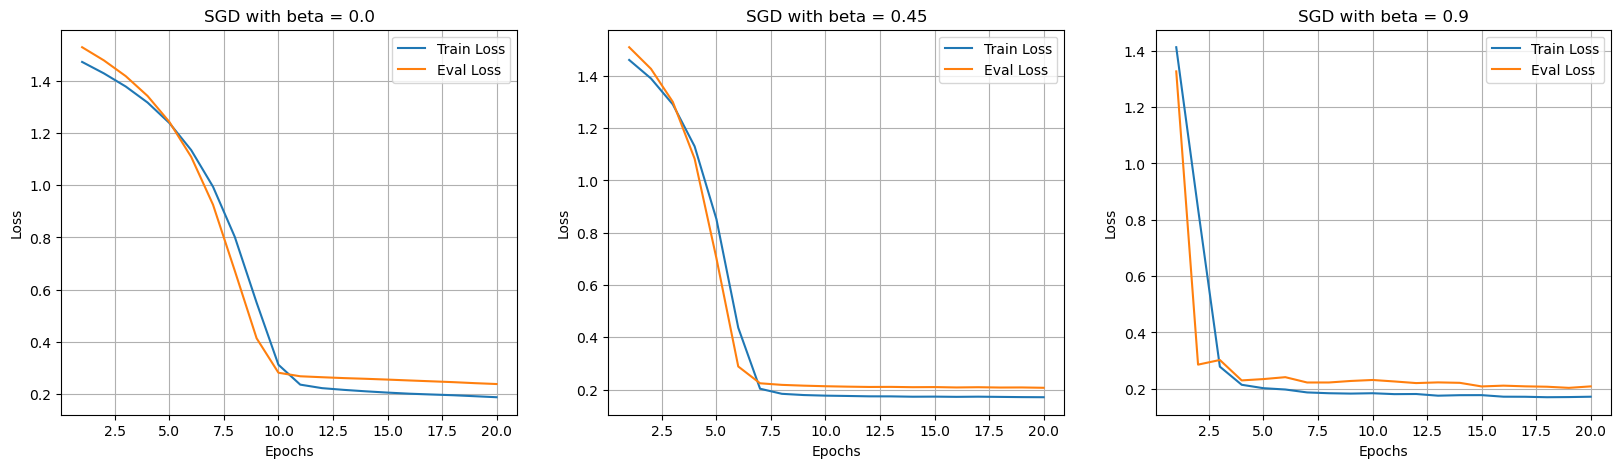

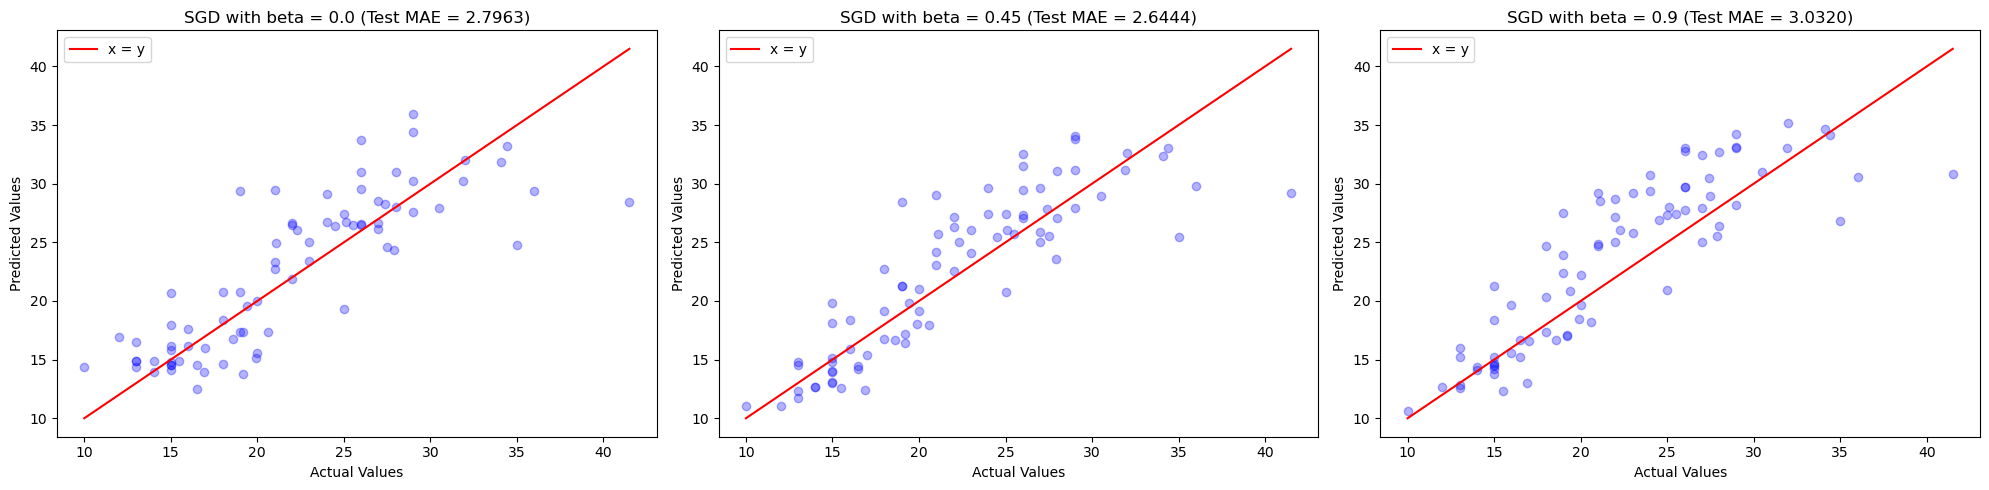

In [5]:
betas = [0.0, 0.45, 0.90]

fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(1, 3, figsize=(20, 5))
axes2 = axes2.flatten()

test_loss_list = []
optimizer_names = []
for idx, beta in enumerate(betas):
    optimizer_name = f'SGD with beta = {beta}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model1().to(device)
    num_epochs = 20
    batch_size = 16
    lr = 0.01
    criterion = nn.L1Loss() # Loss function 
    optimizer = SGD(model.parameters(), lr=lr, beta=beta) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_1, y_train_1, X_eval_1, y_eval_1, model, num_epochs, 
                5, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_regression(X_test_1, y_test_1, model, 'MAE', criterion, axes2[idx])
    
plt.tight_layout()
plt.show()

The plot above shows that as the momentum coefficient increased, the SGD algorithm converged to the minima more quickly. However, higher momentum coefficients led to noisier updates. The momentum coefficient of 0.45 achieved the best performance with a test MAE of 2.6444, outperforming both the coefficient of 0 (test MAE = 2.7963) and the coefficient of 0.9 (test MAE = 3.0320). Momentum helped the algorithm escape local minima, enabling it to converge to a more optimal solution. 

### Auto MPG Prediction Using All the Optimizers
The performance of each optimizer on the testing dataset for predicting MPG is presented below.

Optimizer: SGD with lr = 0.01
Epoch 5/20, Train Loss: 0.4012, Eval Loss: 0.4904
Epoch 10/20, Train Loss: 0.3450, Eval Loss: 0.4121
Epoch 15/20, Train Loss: 0.3386, Eval Loss: 0.4031
Epoch 20/20, Train Loss: 0.3376, Eval Loss: 0.4032
Best Eval Loss: 0.3949
Best Epoch: 18
Test Loss (MAE): 2.7822


Optimizer: Rprop with lr = 0.1
Epoch 5/20, Train Loss: 0.4699, Eval Loss: 0.5784
Epoch 10/20, Train Loss: 0.4696, Eval Loss: 0.5782
Epoch 15/20, Train Loss: 0.4694, Eval Loss: 0.5779
Epoch 20/20, Train Loss: 0.4691, Eval Loss: 0.5776
Best Eval Loss: 0.5776
Best Epoch: 20
Test Loss (MAE): 3.7426


Optimizer: Adagrad with lr = 0.1
Epoch 5/20, Train Loss: 0.3554, Eval Loss: 0.4148
Epoch 10/20, Train Loss: 0.3386, Eval Loss: 0.3955
Epoch 15/20, Train Loss: 0.3311, Eval Loss: 0.3932
Epoch 20/20, Train Loss: 0.3296, Eval Loss: 0.3938
Best Eval Loss: 0.3920
Best Epoch: 16
Test Loss (MAE): 2.7464


Optimizer: RMSprop with lr = 0.01
Epoch 5/20, Train Loss: 0.3750, Eval Loss: 0.4346
Epoch 10/20, Train Lo

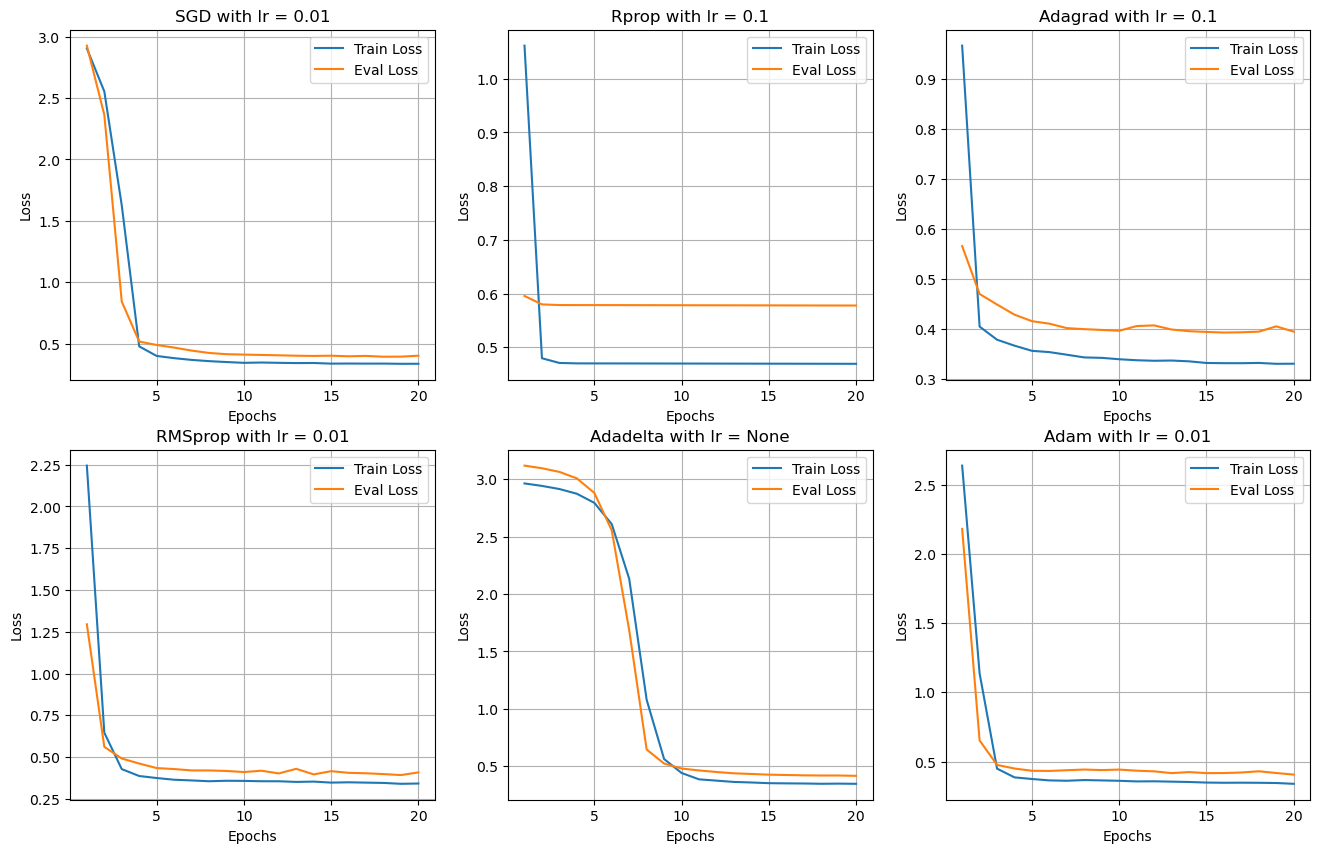

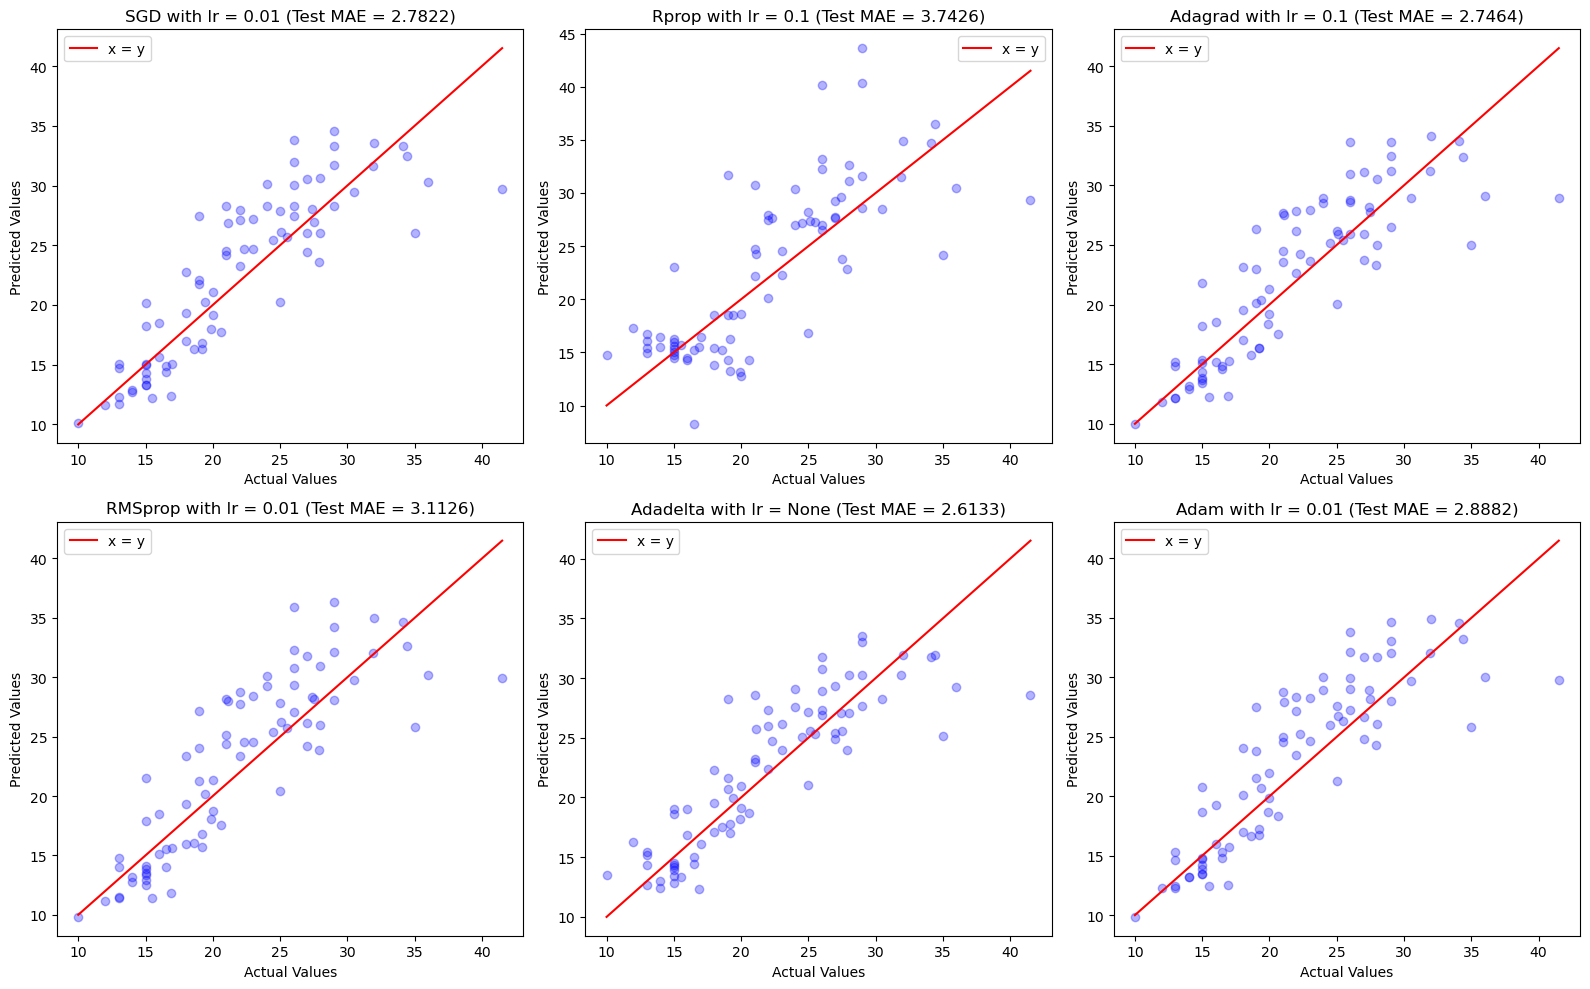

In [6]:
optimizers = [SGD, Rprop, Adagrad, 
              RMSprop, Adadelta, Adam]
lrs = [0.01, 0.1, 0.1, 0.01, None, 0.01]
fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

test_loss_list = []
optimizer_names = []
for idx, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__name__
    optimizer_name += f' with lr = {lrs[idx]}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model1().to(device)
    num_epochs = 20
    batch_size = 8
    criterion = nn.L1Loss() # Loss function  
    optimizer = optimizer(model.parameters(), lr=lrs[idx]) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_1, y_train_1, X_eval_1, y_eval_1, model, num_epochs, 
                5, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_regression(X_test_1, y_test_1, model, 'MAE', criterion, axes2[idx])    

plt.tight_layout()
plt.show()

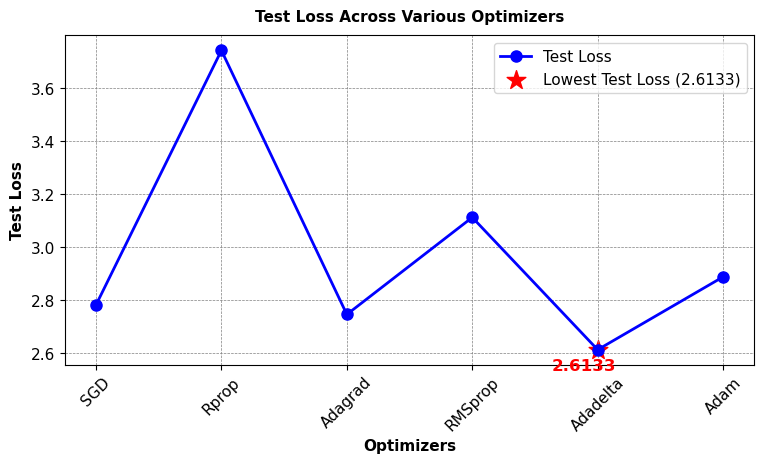

In [7]:
# Plot the test losses for all the optimizers
plot_test_loss_regression(test_loss_list, ['SGD', 'Rprop', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam'])

In the first regression task, the performance of all the optimizers is similar, except for Rprop, for which the test MAE value is higher compared to the other algorithms.

### California Housing Price Prediction Using All the Optimizers with Learning Rates = [0.001, 0.1, 0.01, 0.0001, None, 0.0001]
Initially, relatively lower learning rates are considered for predicting the California housing price.

Optimizer: SGD with lr = 0.001
Epoch 5/20, Train Loss: 0.0102, Eval Loss: 0.0103
Epoch 10/20, Train Loss: 0.0091, Eval Loss: 0.0094
Epoch 15/20, Train Loss: 0.0084, Eval Loss: 0.0087
Epoch 20/20, Train Loss: 0.0078, Eval Loss: 0.0082
Best Eval Loss: 0.0082
Best Epoch: 20
Test Loss (MSE): 0.5150


Optimizer: Rprop with lr = 0.1
Epoch 5/20, Train Loss: 0.0096, Eval Loss: 0.0096
Epoch 10/20, Train Loss: 0.0095, Eval Loss: 0.0095
Epoch 15/20, Train Loss: 0.0095, Eval Loss: 0.0095
Epoch 20/20, Train Loss: 0.0094, Eval Loss: 0.0094
Best Eval Loss: 0.0094
Best Epoch: 20
Test Loss (MSE): 0.7750


Optimizer: Adagrad with lr = 0.01
Epoch 5/20, Train Loss: 0.0070, Eval Loss: 0.0072
Epoch 10/20, Train Loss: 0.0062, Eval Loss: 0.0067
Epoch 15/20, Train Loss: 0.0060, Eval Loss: 0.0065
Epoch 20/20, Train Loss: 0.0058, Eval Loss: 0.0063
Best Eval Loss: 0.0063
Best Epoch: 20
Test Loss (MSE): 0.3821


Optimizer: RMSprop with lr = 0.0001
Epoch 5/20, Train Loss: 0.0372, Eval Loss: 0.0305
Epoch 10/20, Trai

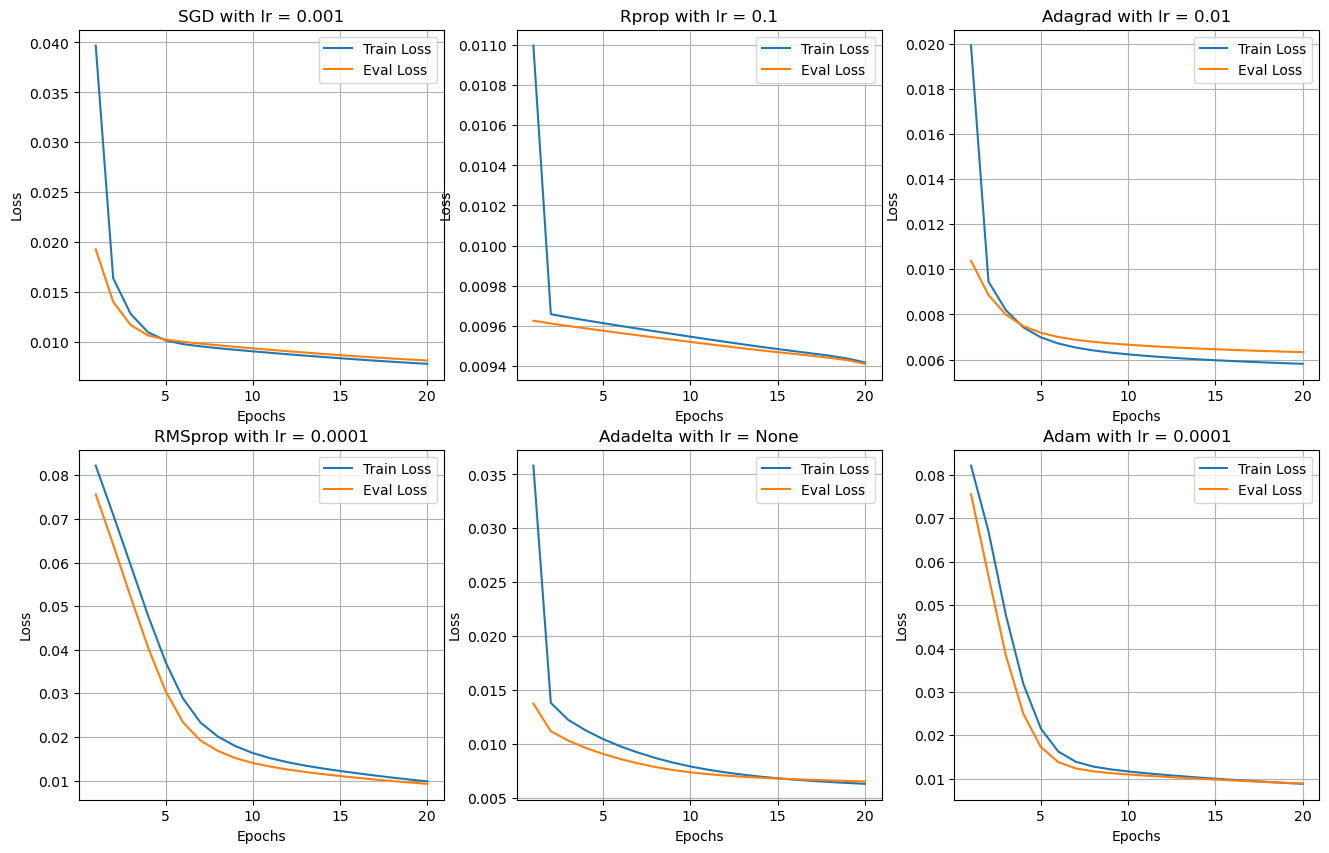

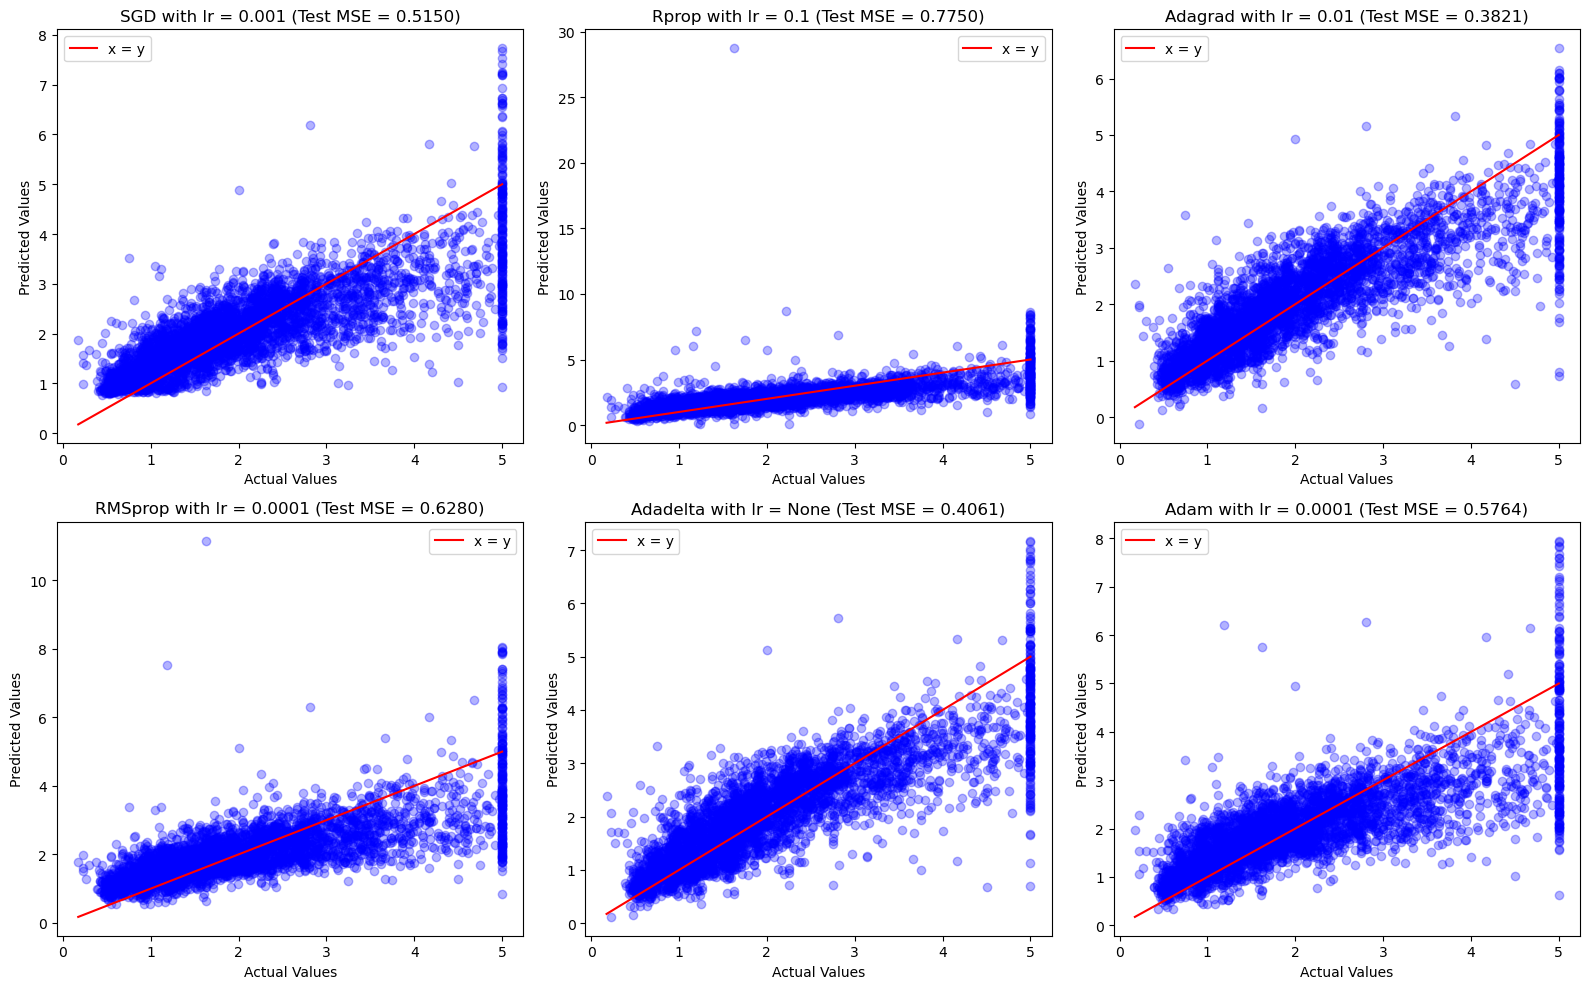

In [8]:
optimizers = [SGD, Rprop, Adagrad, 
              RMSprop, Adadelta, Adam]
lrs = [0.001, 0.1, 0.01, 0.0001, None, 0.0001]
fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

test_loss_list = []
optimizer_names = []
for idx, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__name__
    optimizer_name += f' with lr = {lrs[idx]}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model2().to(device)  
    num_epochs = 20
    batch_size = 64
    criterion = nn.MSELoss() # Loss function  
    optimizer = optimizer(model.parameters(), lr=lrs[idx]) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_2, y_train_2, X_eval_2, y_eval_2, model, num_epochs, 
                5, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_regression(X_test_2, y_test_2, model, 'MSE', criterion, axes2[idx])  

plt.tight_layout()
plt.show()

### California Housing Price Prediction Using All the Optimizers with Learning Rates = [0.01, 1, 0.1, 0.001, None, 0.001]
Now, the learning rate has been increased tenfold compared to the previous cell to predict the California Housing Price.

Optimizer: SGD with lr = 0.01
Epoch 5/20, Train Loss: 0.0066, Eval Loss: 0.0070
Epoch 10/20, Train Loss: 0.0060, Eval Loss: 0.0065
Epoch 15/20, Train Loss: 0.0057, Eval Loss: 0.0062
Epoch 20/20, Train Loss: 0.0055, Eval Loss: 0.0060
Best Eval Loss: 0.0060
Best Epoch: 20
Test Loss (MSE): 0.3595


Optimizer: Rprop with lr = 1
Epoch 5/20, Train Loss: 0.0089, Eval Loss: 0.0087
Epoch 10/20, Train Loss: 0.0089, Eval Loss: 0.0087
Epoch 15/20, Train Loss: 0.0089, Eval Loss: 0.0087
Epoch 20/20, Train Loss: 0.0089, Eval Loss: 0.0087
Best Eval Loss: 0.0087
Best Epoch: 20
Test Loss (MSE): 0.5809


Optimizer: Adagrad with lr = 0.1
Epoch 5/20, Train Loss: 0.0053, Eval Loss: 0.0058
Epoch 10/20, Train Loss: 0.0050, Eval Loss: 0.0056
Epoch 15/20, Train Loss: 0.0048, Eval Loss: 0.0054
Epoch 20/20, Train Loss: 0.0047, Eval Loss: 0.0053
Best Eval Loss: 0.0053
Best Epoch: 20
Test Loss (MSE): 0.3112


Optimizer: RMSprop with lr = 0.001
Epoch 5/20, Train Loss: 0.0068, Eval Loss: 0.0069
Epoch 10/20, Train Los

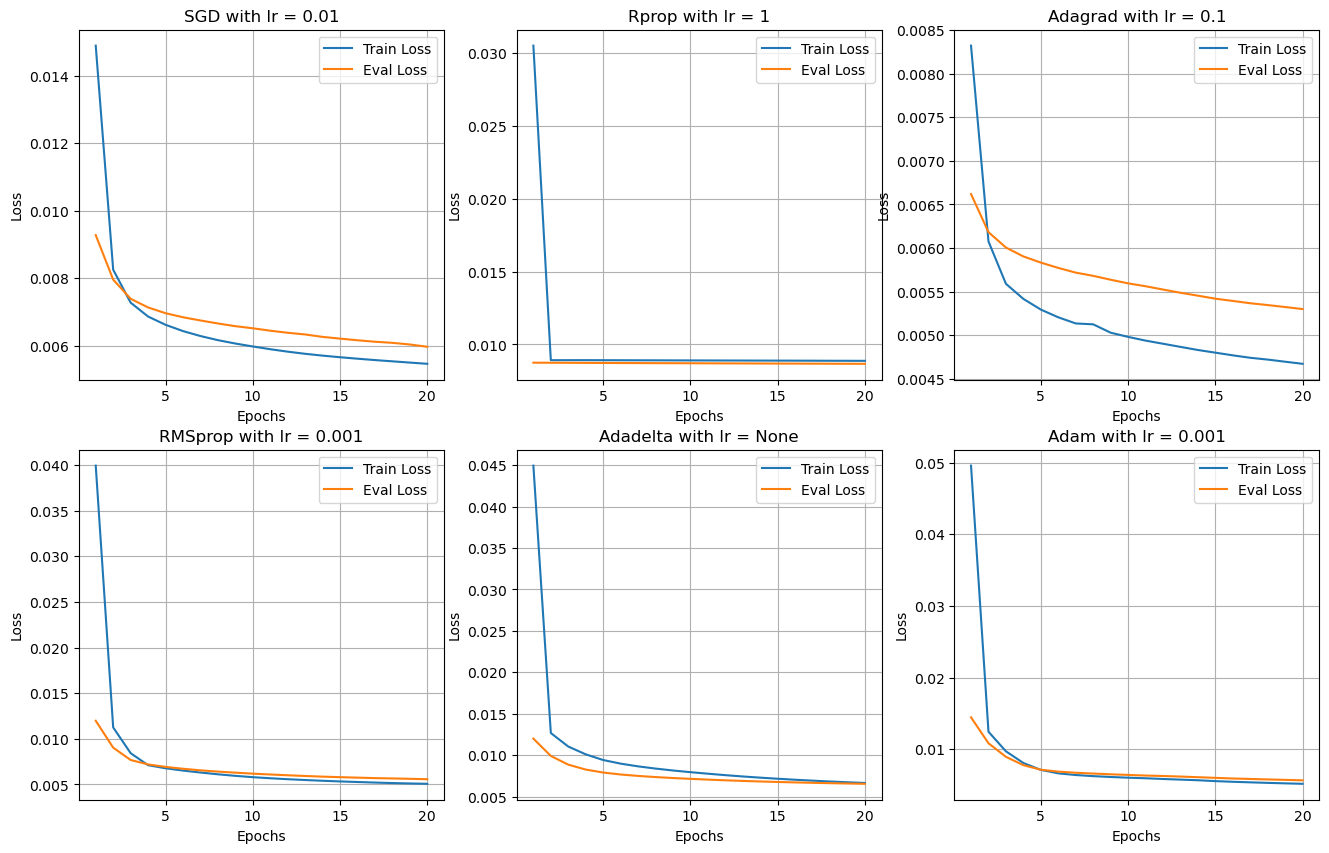

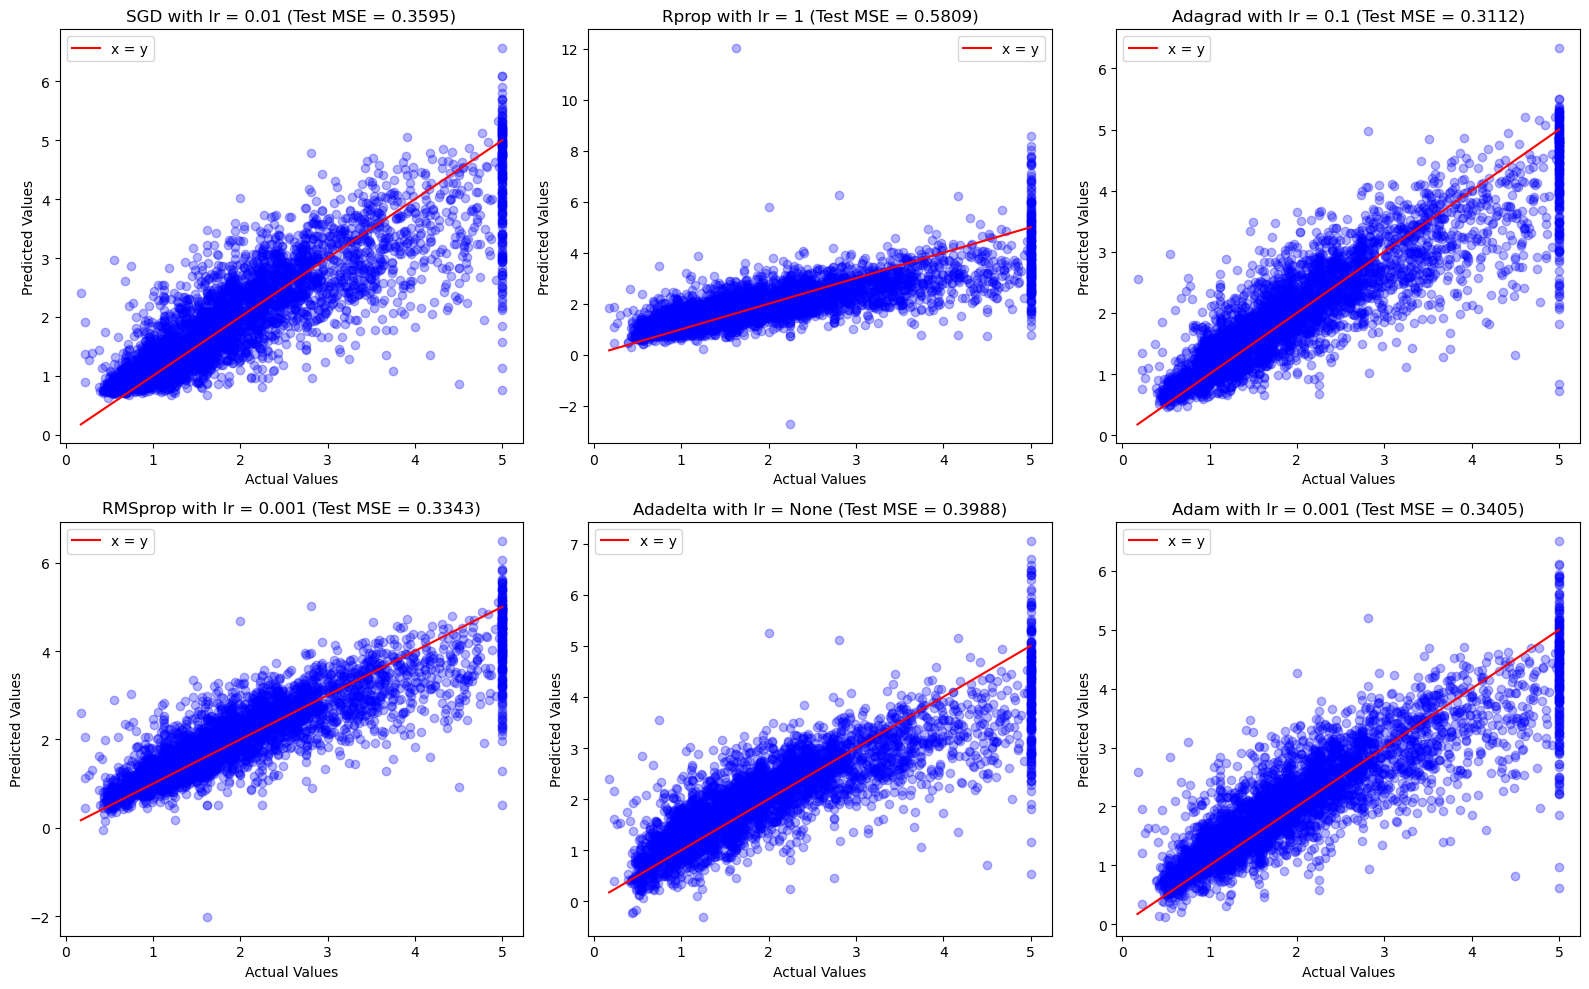

In [9]:
optimizers = [SGD, Rprop, Adagrad, 
              RMSprop, Adadelta, Adam]
lrs = [0.01, 1, 0.1, 0.001, None, 0.001]
fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

test_loss_list = []
optimizer_names = []
for idx, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__name__
    optimizer_name += f' with lr = {lrs[idx]}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model2().to(device)  
    num_epochs = 20
    batch_size = 64
    criterion = nn.MSELoss() # Loss function  
    optimizer = optimizer(model.parameters(), lr=lrs[idx]) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_2, y_train_2, X_eval_2, y_eval_2, model, num_epochs, 
                5, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_regression(X_test_2, y_test_2, model, 'MSE', criterion, axes2[idx])  

plt.tight_layout()
plt.show()

Comparing the plots from the two cells above, we can see that as the learning rate increased, the algorithms converged to a minimum faster, but the updates were sometimes noisy.

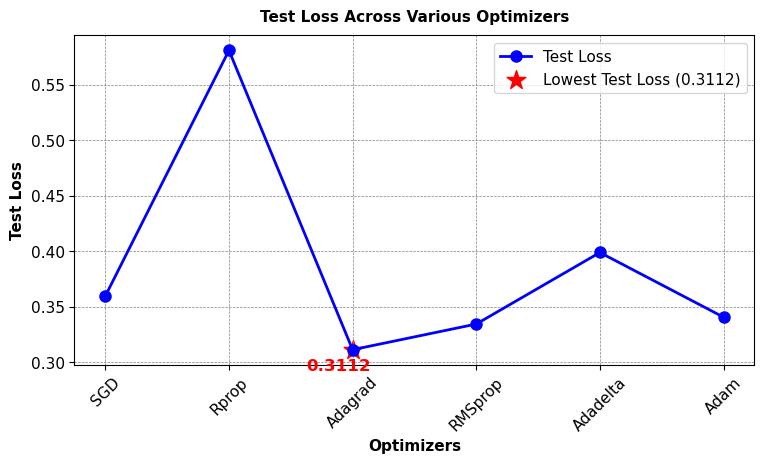

In [10]:
# Plot the test losses for all the optimizers
plot_test_loss_regression(test_loss_list, ['SGD', 'Rprop', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam'])

In the second regression task, the performance of all the optimizers is similar, except for Rprop, for which the test MSE value is higher compared to the other algorithms.

## Breast Cancer Prediction Using All the Optimizers With Batch Size = 1
Initially, predictions are made using a lower batch size of 1 for parameter updates.

Optimizer: SGD with lr = 0.05
Epoch 2/10, Train Loss: 0.0975, Eval Loss: 0.1495
Epoch 4/10, Train Loss: 0.0241, Eval Loss: 0.1796
Epoch 6/10, Train Loss: 0.0237, Eval Loss: 0.1779
Epoch 8/10, Train Loss: 0.0096, Eval Loss: 0.1754
Epoch 10/10, Train Loss: 0.0302, Eval Loss: 0.1406
Best Eval Loss: 0.1033
Best Epoch: 9
Test Loss (BCE): 0.2110


Optimizer: Rprop with lr = 0.0001
Epoch 2/10, Train Loss: 0.3658, Eval Loss: 0.3647
Epoch 4/10, Train Loss: 0.3569, Eval Loss: 0.3575
Epoch 6/10, Train Loss: 0.3541, Eval Loss: 0.3548
Epoch 8/10, Train Loss: 0.3519, Eval Loss: 0.3530
Epoch 10/10, Train Loss: 0.3512, Eval Loss: 0.3522
Best Eval Loss: 0.3522
Best Epoch: 10
Test Loss (BCE): 0.3551


Optimizer: Adagrad with lr = 0.1
Epoch 2/10, Train Loss: 0.0543, Eval Loss: 0.1458
Epoch 4/10, Train Loss: 0.0206, Eval Loss: 0.8020
Epoch 6/10, Train Loss: 0.0198, Eval Loss: 0.2002
Epoch 8/10, Train Loss: 0.0022, Eval Loss: 0.7426
Epoch 10/10, Train Loss: 0.0011, Eval Loss: 0.7443
Best Eval Loss: 0.1389


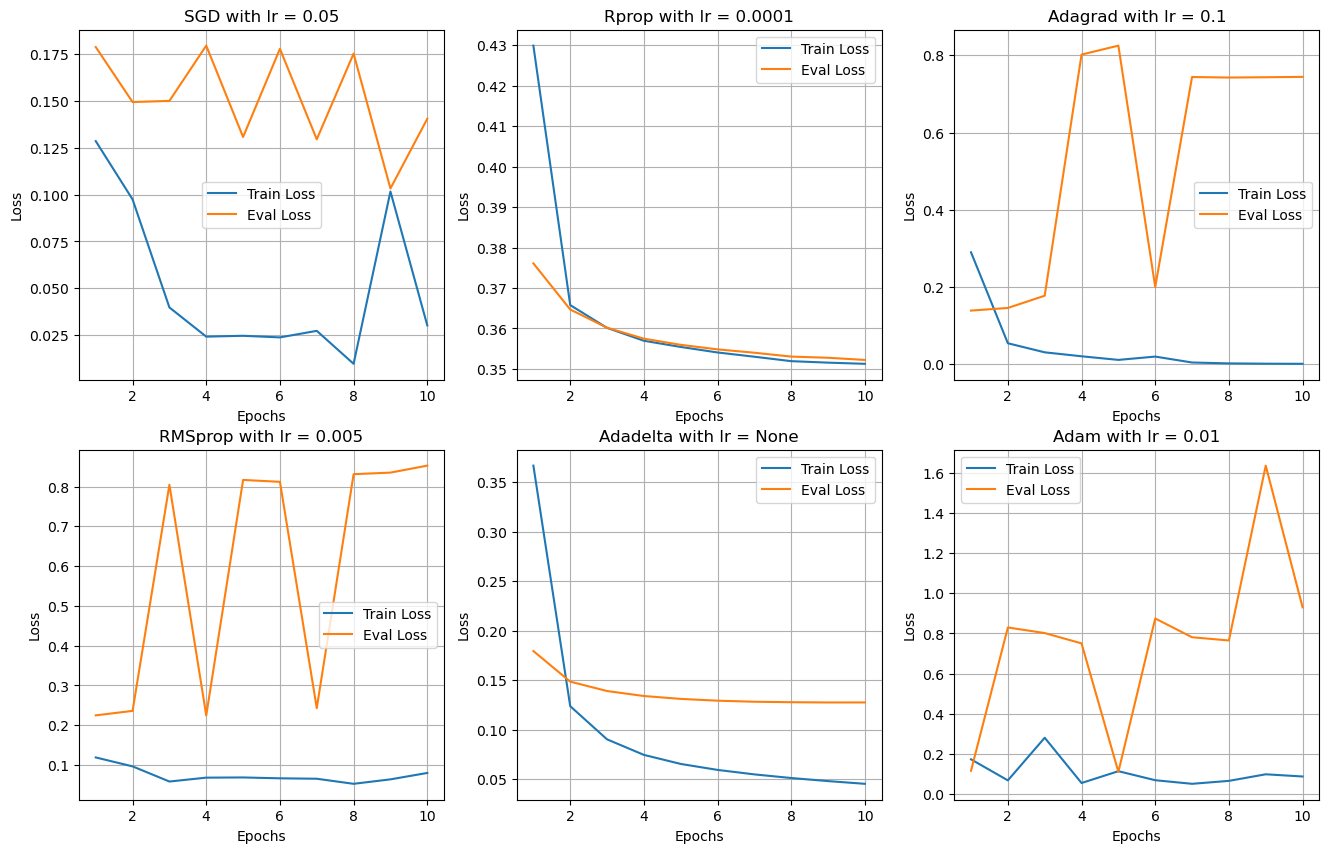

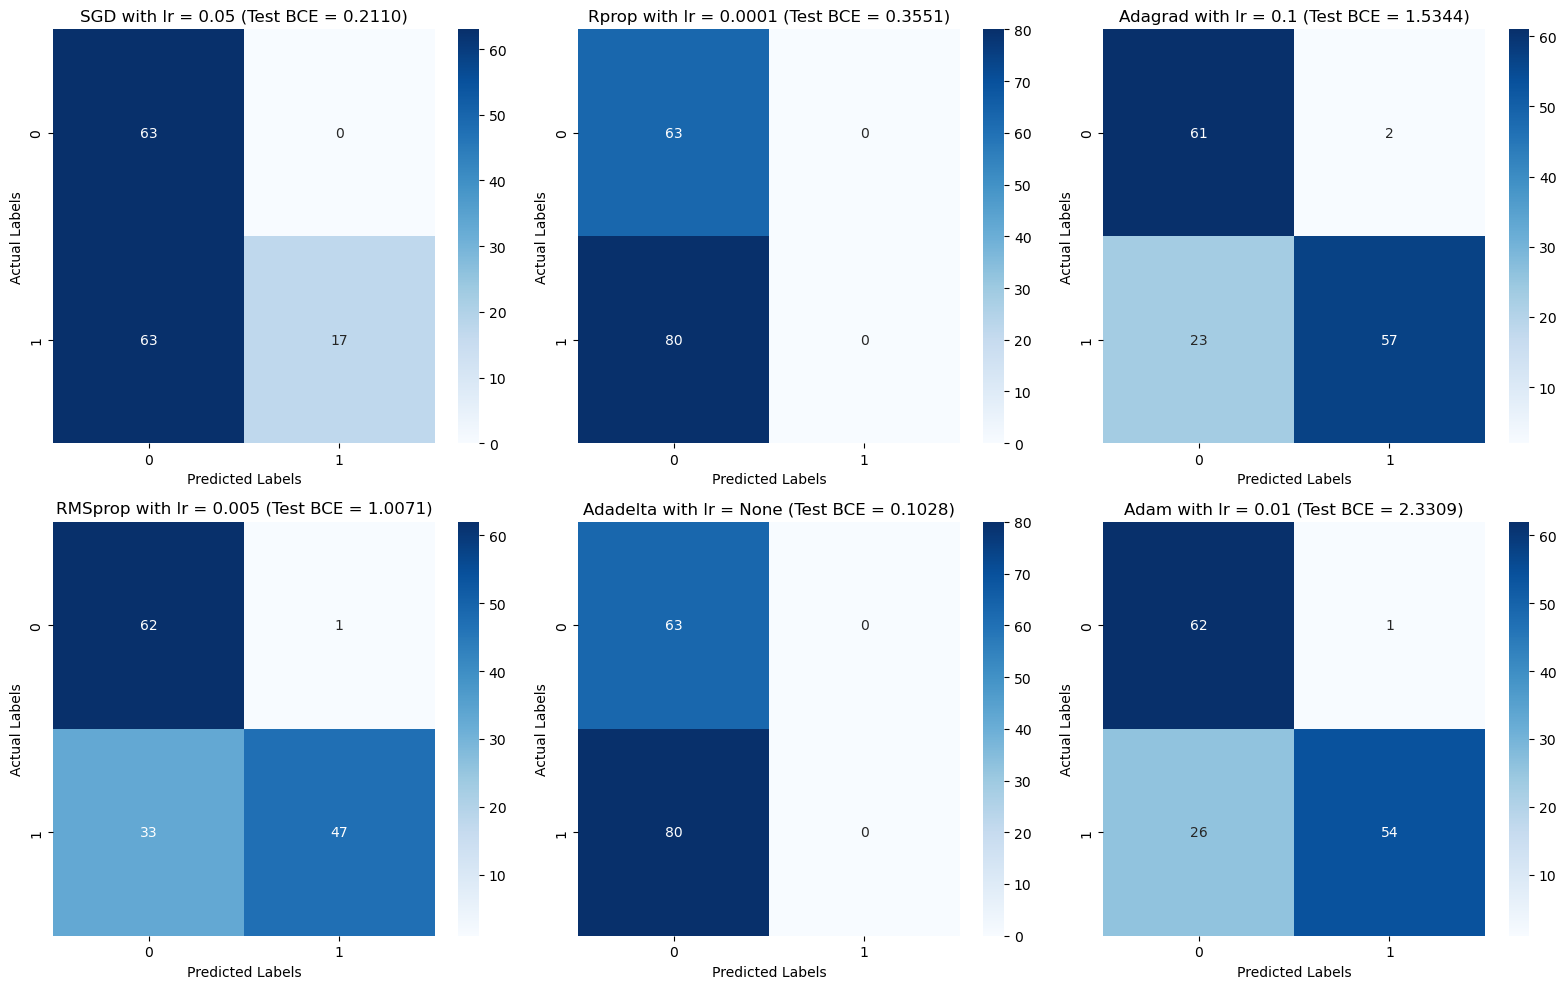

In [11]:
optimizers = [SGD, Rprop, Adagrad, 
              RMSprop, Adadelta, Adam]
lrs = [0.05, 0.0001, 0.1, 0.005, None, 0.01]
fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

f1_score_list = []
optimizer_names = []
for idx, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__name__
    optimizer_name += f' with lr = {lrs[idx]}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model3().to(device)  
    num_epochs = 10
    batch_size = 1
    criterion = nn.BCELoss() # Loss function  
    optimizer = optimizer(model.parameters(), lr=lrs[idx]) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_3, y_train_3, X_eval_3, y_eval_3, model, num_epochs, 
                2, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_classification(X_test_3, y_test_3, model, 'BCE', criterion, axes2[idx]) 
    

plt.tight_layout()
plt.show()

## Breast Cancer Prediction Using All the Optimizers With Batch Size = 8
Now, the batch size is increased from 1 to 8 for parameter updates.

Optimizer: SGD with lr = 0.05
Epoch 2/10, Train Loss: 0.0161, Eval Loss: 0.0151
Epoch 4/10, Train Loss: 0.0068, Eval Loss: 0.0126
Epoch 6/10, Train Loss: 0.0041, Eval Loss: 0.0120
Epoch 8/10, Train Loss: 0.0027, Eval Loss: 0.0117
Epoch 10/10, Train Loss: 0.0019, Eval Loss: 0.0118
Best Eval Loss: 0.0117
Best Epoch: 8
Test Loss (BCE): 0.1318


Optimizer: Rprop with lr = 0.0001
Epoch 2/10, Train Loss: 0.0140, Eval Loss: 0.0217
Epoch 4/10, Train Loss: 0.0134, Eval Loss: 0.0229
Epoch 6/10, Train Loss: 0.0133, Eval Loss: 0.0229
Epoch 8/10, Train Loss: 0.0132, Eval Loss: 0.0229
Epoch 10/10, Train Loss: 0.0132, Eval Loss: 0.0229
Best Eval Loss: 0.0208
Best Epoch: 1
Test Loss (BCE): 0.1391


Optimizer: Adagrad with lr = 0.1
Epoch 2/10, Train Loss: 0.0039, Eval Loss: 0.0138
Epoch 4/10, Train Loss: 0.0034, Eval Loss: 0.0158
Epoch 6/10, Train Loss: 0.0004, Eval Loss: 0.0151
Epoch 8/10, Train Loss: 0.0002, Eval Loss: 0.0159
Epoch 10/10, Train Loss: 0.0001, Eval Loss: 0.0166
Best Eval Loss: 0.0110
B

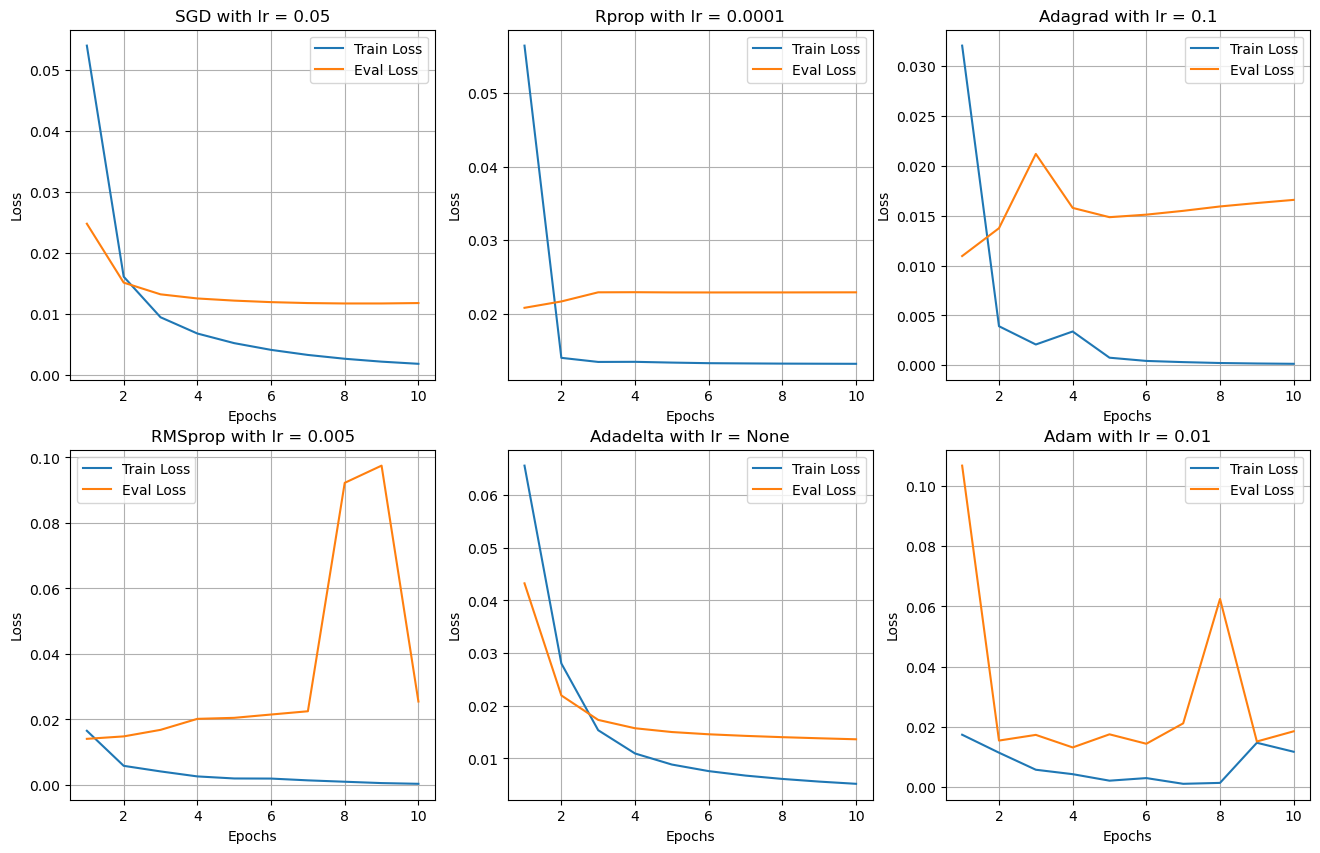

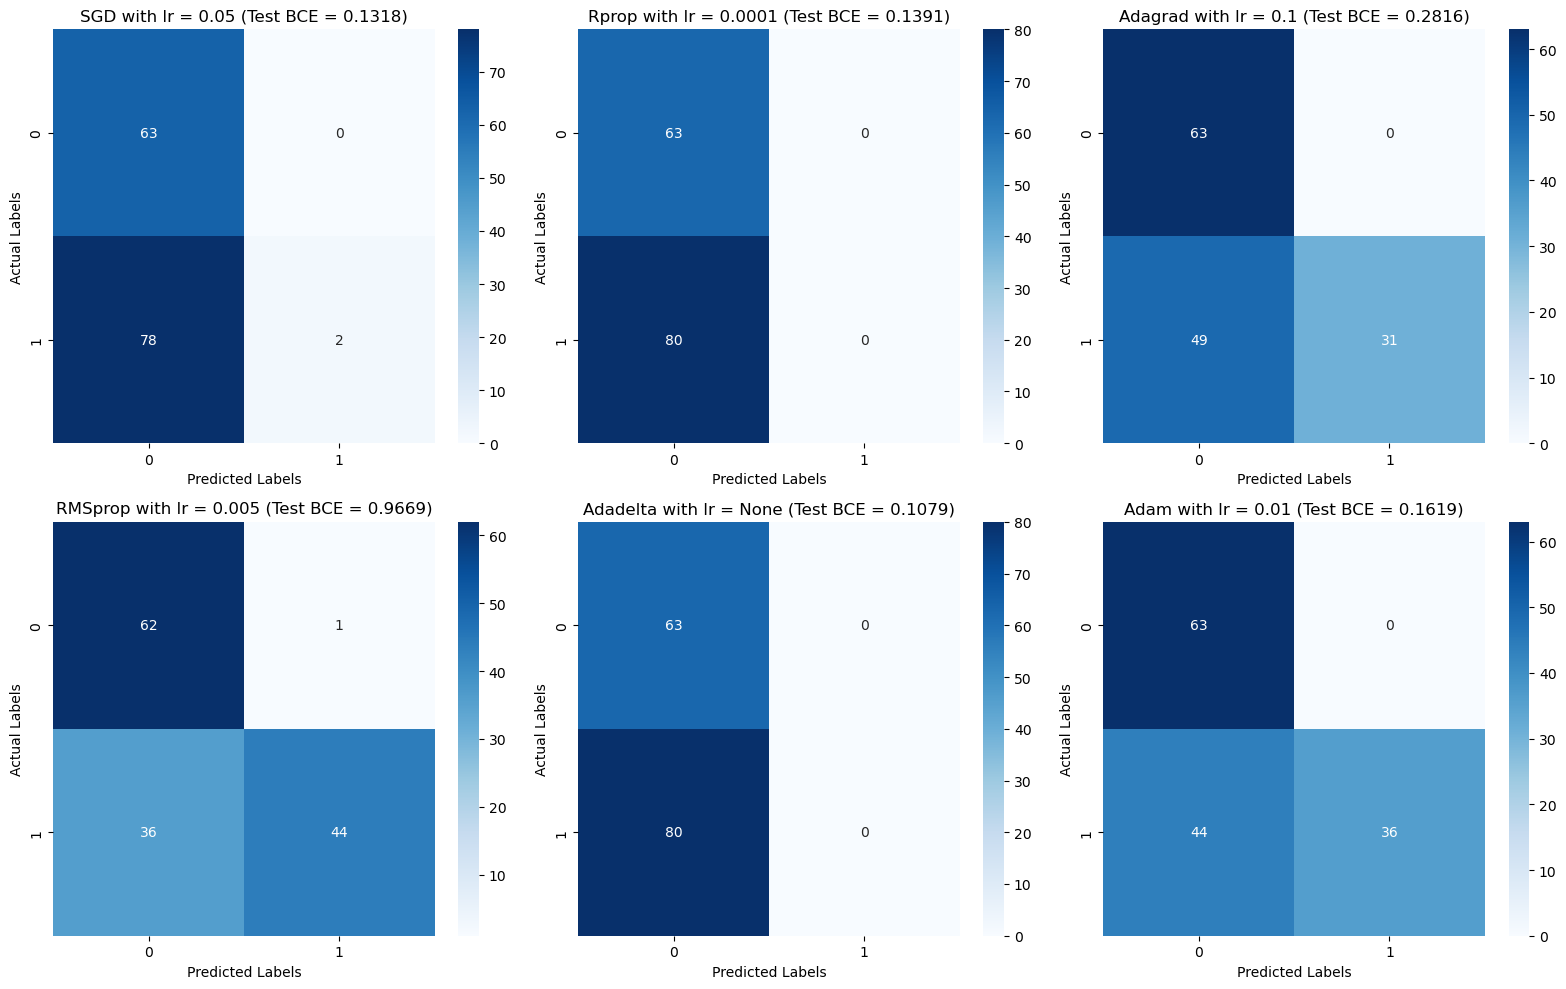

In [12]:
optimizers = [SGD, Rprop, Adagrad, 
              RMSprop, Adadelta, Adam]
lrs = [0.05, 0.0001, 0.1, 0.005, None, 0.01]
fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

f1_score_list = []
optimizer_names = []
for idx, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__name__
    optimizer_name += f' with lr = {lrs[idx]}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model3().to(device)  
    num_epochs = 10
    batch_size = 8
    criterion = nn.BCELoss() # Loss function  
    optimizer = optimizer(model.parameters(), lr=lrs[idx]) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_3, y_train_3, X_eval_3, y_eval_3, model, num_epochs, 
                2, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_classification(X_test_3, y_test_3, model, 'BCE', criterion, axes2[idx]) 
    

plt.tight_layout()
plt.show()

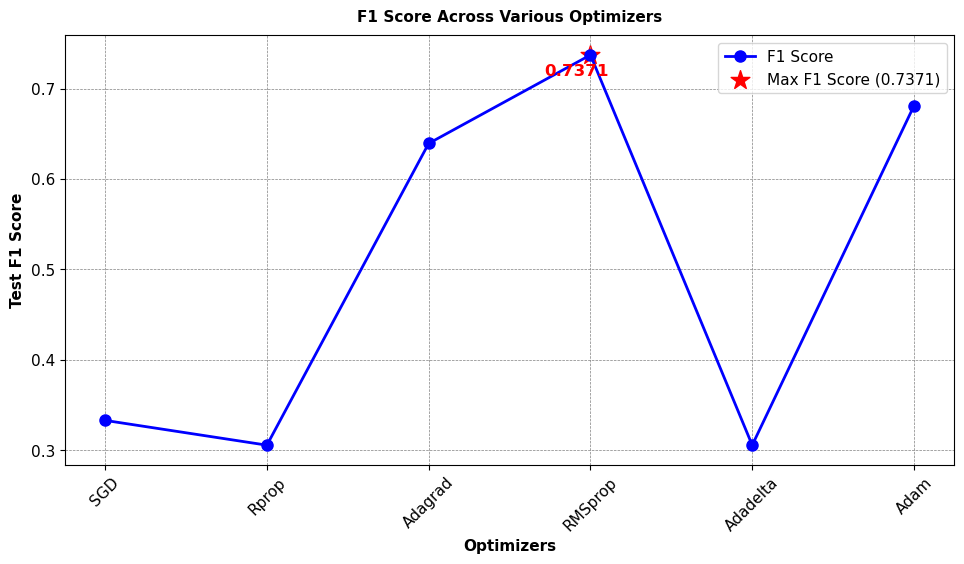

In [13]:
# Plot the f1 scores for all the optimizers
plot_test_f1_classification(f1_score_list, ['SGD', 'Rprop', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam'])

In the first classification task, the Adam optimizer performed the best, achieving a test F1 score of approximately 0.75.

## Fashion MNIST Classification Using All the Optimizers

Optimizer: SGD with lr = 0.01
Epoch 1/5, Train Loss: 0.0122, Eval Loss: 0.0068
Epoch 2/5, Train Loss: 0.0061, Eval Loss: 0.0054
Epoch 3/5, Train Loss: 0.0053, Eval Loss: 0.0048
Epoch 4/5, Train Loss: 0.0049, Eval Loss: 0.0045
Epoch 5/5, Train Loss: 0.0046, Eval Loss: 0.0040
Best Eval Loss: 0.0040
Best Epoch: 5
Test Loss (CCE): 0.5141


Optimizer: Rprop with lr = 0.001
Epoch 1/5, Train Loss: 0.0071, Eval Loss: 0.0053
Epoch 2/5, Train Loss: 0.0063, Eval Loss: 0.0052
Epoch 3/5, Train Loss: 0.0061, Eval Loss: 0.0051
Epoch 4/5, Train Loss: 0.0059, Eval Loss: 0.0051
Epoch 5/5, Train Loss: 0.0059, Eval Loss: 0.0050
Best Eval Loss: 0.0050
Best Epoch: 5
Test Loss (CCE): 0.6363


Optimizer: Adagrad with lr = 0.1
Epoch 1/5, Train Loss: 0.0237, Eval Loss: 0.0062
Epoch 2/5, Train Loss: 0.0067, Eval Loss: 0.0053
Epoch 3/5, Train Loss: 0.0062, Eval Loss: 0.0049
Epoch 4/5, Train Loss: 0.0059, Eval Loss: 0.0046
Epoch 5/5, Train Loss: 0.0057, Eval Loss: 0.0052
Best Eval Loss: 0.0046
Best Epoch: 4
Test L

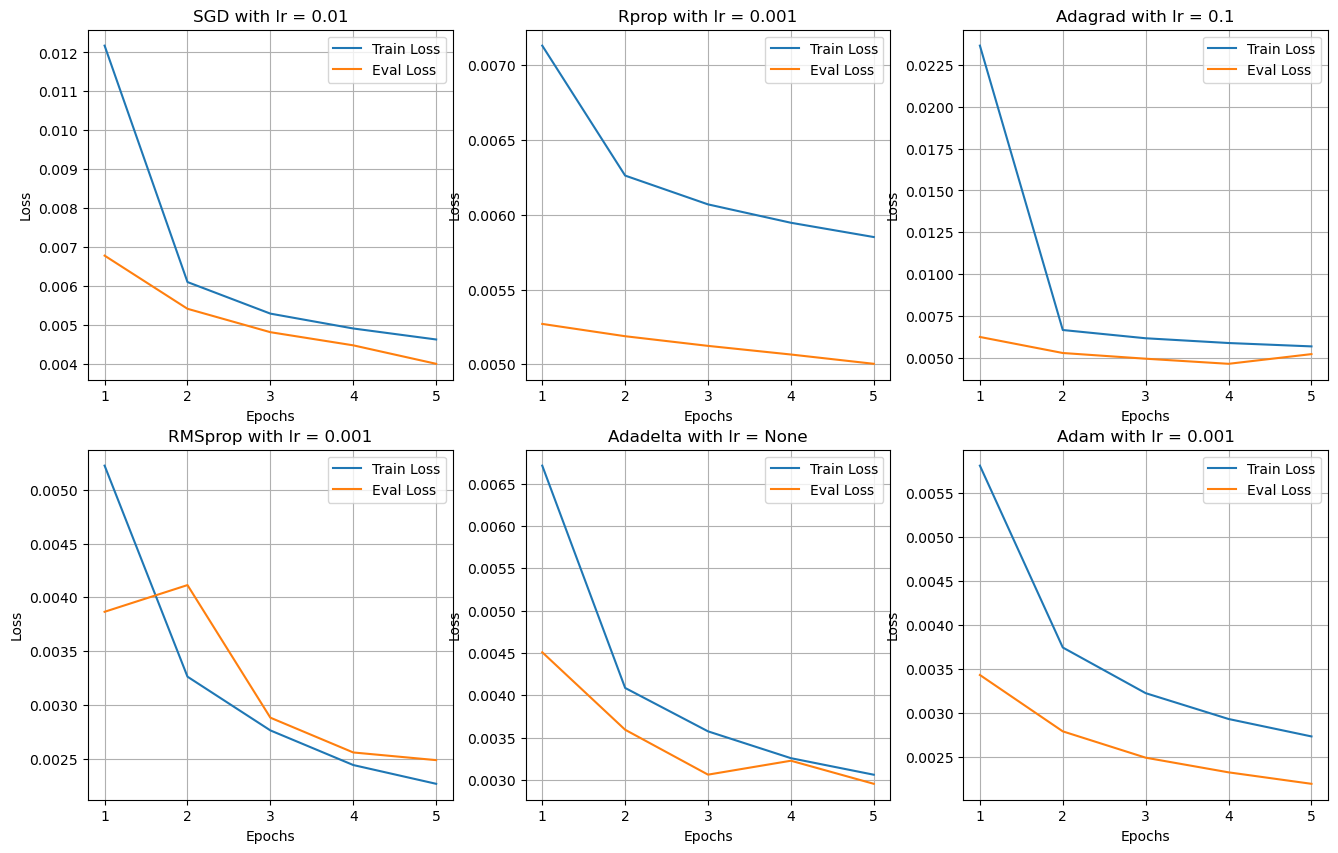

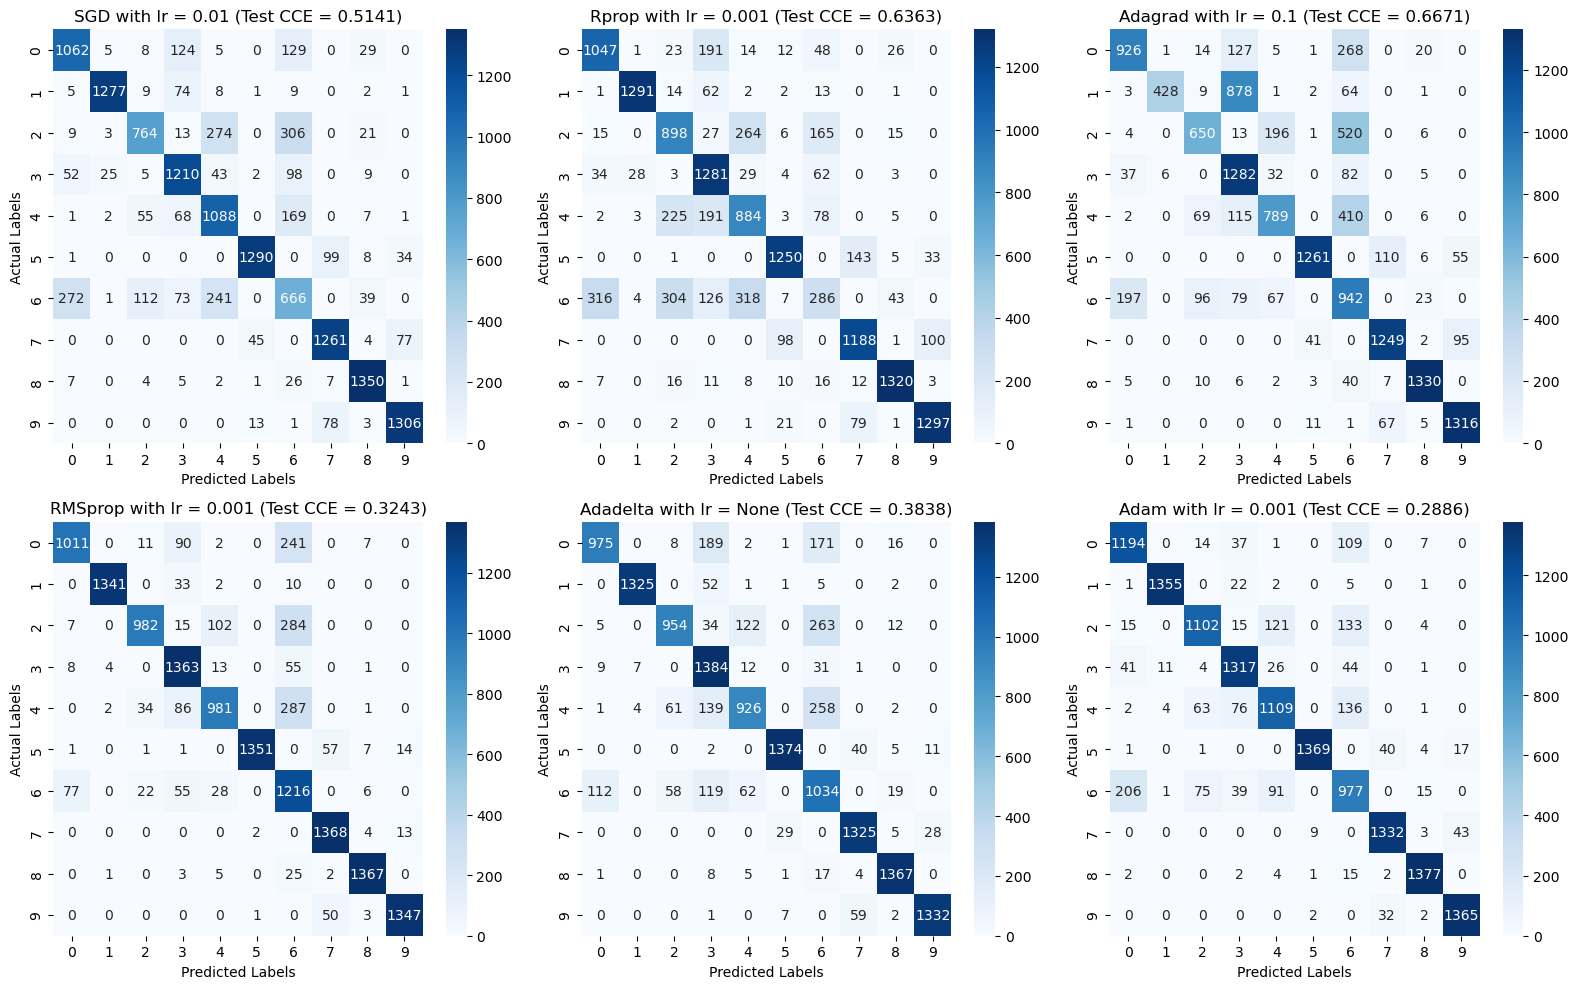

In [14]:
optimizers = [SGD, Rprop, Adagrad, 
              RMSprop, Adadelta, Adam]
lrs = [0.01, 0.001, 0.1, 0.001, None, 0.001]
fig1, axes1 = plt.subplots(2, 3, figsize=(16, 10))
axes1 = axes1.flatten()
fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

f1_score_list = []
optimizer_names = []
for idx, optimizer in enumerate(optimizers):
    optimizer_name = optimizer.__name__
    optimizer_name += f' with lr = {lrs[idx]}'
    optimizer_names.append(optimizer_name)
    print(f'\033[1mOptimizer: {optimizer_name}\033[0m')

    # Initialize model and set up training parameters
    model = Model4().to(device)  
    num_epochs = 5
    batch_size = 128
    criterion = nn.CrossEntropyLoss() # Loss function  
    optimizer = optimizer(model.parameters(), lr=lrs[idx]) # Initialize optimizer

    # Train model and plot losses
    train_model(X_train_4, y_train_4, X_eval_4, y_eval_4, model, num_epochs, 
                1, batch_size, criterion, optimizer, axes1[idx])
    # Test best model and plot losses
    test_model_classification(X_test_4, y_test_4, model, 'CCE', criterion, axes2[idx]) 
        

plt.tight_layout()
plt.show()

From the test confusion matrices above, we can see that all the optimizers performed fairly well, as the diagonal values are significantly higher than the non-diagonal values.

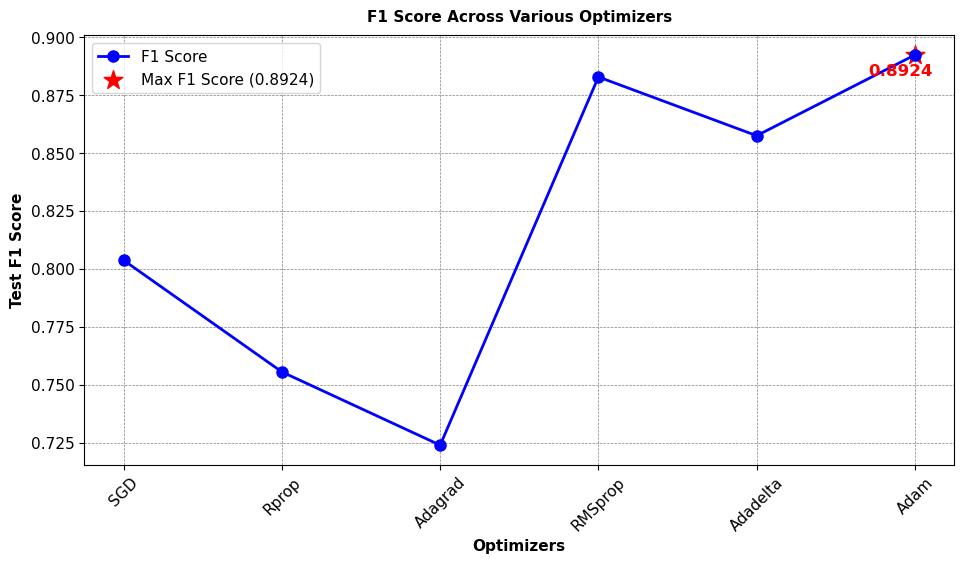

In [15]:
# Plot the f1 scores for all the optimizers
plot_test_f1_classification(f1_score_list, ['SGD', 'Rprop', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam'])

In the second classification task, the Adam optimizer performed the best, achieving a test F1 score of approximately 0.90.

Overall, the Adam optimizer is the most robust and performed the best across all the test problems. It considers both the first and second moments of the gradients to update the parameters.

## Discussion and Conclusion

The following are the fundamental differences between the optimizers:
* Gradient descent without momentum will take a long time to traverse a nearly flat surface, but by allowing momentum to accumulate, we not only increase the traversal speed but also avoid local minima.
* Momentum-only methods updates all the variables with same learning rate but adaptive methods adapts a learning rate for each variable.
* Adaptive methods provides better updates to variables when the variables have consistently high gradients.
* Adaptive methods are comparitively less sensitive to learning rate compare to momentum-based methods.
* Rprop is the initial adaptive method which only considers the sign of the gradient for updates.
* The learning rate in Adagrad continuously descrease with the number of iteration as the value of $s^{(k)}_i$ continuously increases with the number of iterations.
* RMSprop and Adadelta are developed to avoid the effect of a monotonically decreasing learning rate and ensure better convergence.
* Adadelta eliminates the need of learning rate parameter.
* Adam optimizer leverages the benefits of both the gradient momentum and exponential decaying squared gradient like RMSprop and Adadelta.

Understanding the convergence of Stochastic Gradient Descent with Momentum Coefficient:
* From the results, we saw that as the momentum coefficient increased, the rate of convergence of stochastic gradient descent also increased.
* However, a higher momentum coefficient may not always be optimal, as in our case, the performance of the optimizer is best when the momentum coefficient is 0.45, rather than 0 or 0.9. A higher momentum coefficient might lead to noisy updates and overshoot the optimal value.

Understanding the impact of learning rate and batch size on optimizer performance:
* Increasing the learning rate generally accelerates convergence, allowing the model to reach a solution faster. However, too large a learning rate may cause the algorithm to overshoot the optimal minima, resulting in sub-optimal performance.
* Smaller batch sizes result in noisier updates due to more frequent parameter adjustments, while larger batch sizes lead to less frequent but smoother updates, as the model is updated based on a larger sample of data.
* While larger batch sizes can improve computational efficiency, they may also lead to overfitting, reducing the model’s ability to generalize well on unseen data.

Finally, after comparing the performance of all the optimizers across all the test problems, we found that Adam is the most robust optimizer, performing consistently well in all the test problems and achieving a test macro F1 score of up to **90%** for the Fashion MNIST classification problem.

### References

Mykel J. Kochenderfer, Tim Allan Wheeler, Algorithms for optimization (2019, MIT Press).